# Lead Score Case Study Assignment

##### By Ratheesh Harshavardhanan, Uma Devi K and Deena Namreen

## Problem Statement 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Once user vist the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30% which is very poor.

### Data
This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.  The target variable is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.


### Business Goal:
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Steps for buiding logistic regression model
- Step 1 - Import libraries
- Step 2 - Reading and Understanding Data
- Step 3 - Cleaning the data
- Step 4 - Visualising the data using EDA
- Step 5 - Creat Dummy Variables
- Step 6 - Splitting the Data into Training and Testing sets
- Step 7 - Feature Scaling
- Setp 8 - Building a logistic regression model
- Step 9 - Feature Selection using RFE
- Step 10 - Plotting ROC curve
- Step 11 - Determine Optimal Cutoff Point
- Step 12 - Making Prediction on the test set using final model
- Step 13 - Model Evaluation
- Step 14 -Final Inferences

## Step 1: Import all required packages and libraries

In [905]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#Import required libraries to build a model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Step 2: Reading and Understanding the Data

In [906]:
#Load data from the file into a datafrae=me
lead_df = pd.read_csv('Leads.csv')

# examing first few rows
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [907]:
#Check shape of data
lead_df.shape

(9240, 37)

In [908]:
#Check columns in data
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [909]:
#Check data types and null values in data
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [910]:
#Describe the data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Cleaning the data

In [911]:
#Distinct values in each columns to identify numeric vs categorical columns
lead_df.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine            

In [912]:
#Check for duplicates
duplicate_list = lead_df.duplicated()
duplicate_list.value_counts()

False    9240
dtype: int64

##### There are no duplicates

In [913]:
#Check no of nulls in each column
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [914]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [915]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
len(nullvalues)

#There are 17 columns which has null values

37

In [916]:
nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)
#There are 6 columns which has more than 30 percetage values as null. 
#These columns should be dropped from the dataframe

6

In [917]:
nullvalues

Lead Quality                   4767
Asymmetrique Activity Index    4218
Asymmetrique Profile Score     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Index     4218
Tags                           3353
dtype: int64

In [918]:
nullvalues.index

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags'],
      dtype='object')

In [919]:
#Drop these 6 columns which has > 30% of null values
lead_df.drop(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags'], 1, inplace = True)

In [920]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)

0

In [921]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [922]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
focuscolumns = nullvalues[nullvalues.values > 0]
len(focuscolumns)
#There are 11 columns which still has null values. These columns need to be assessed in detail.

11

In [923]:
focuscolumns

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64

Column Name:  What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


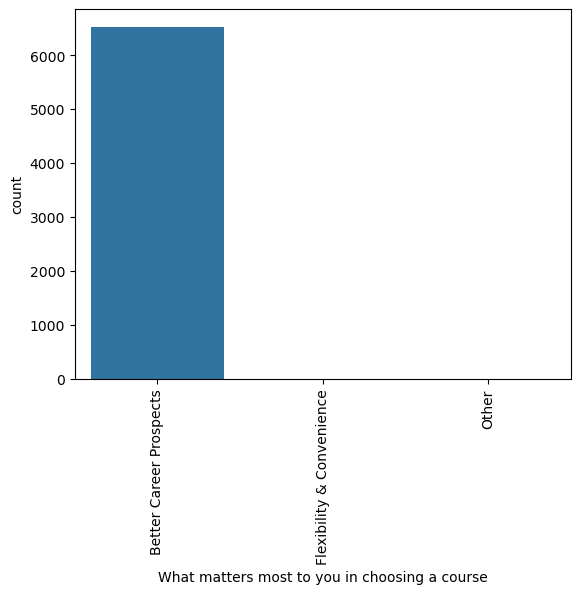

***********************************

Column Name:  Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


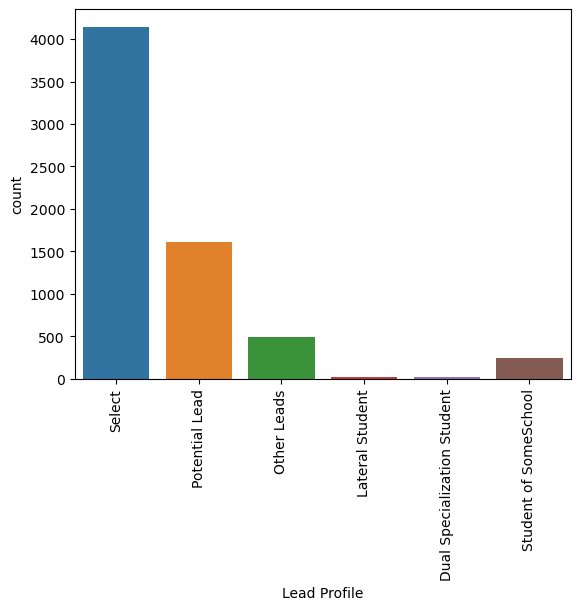

***********************************

Column Name:  What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


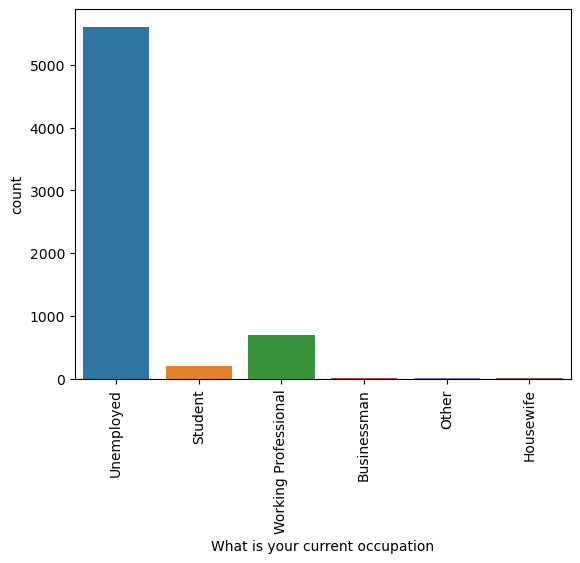

***********************************

Column Name:  Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania     

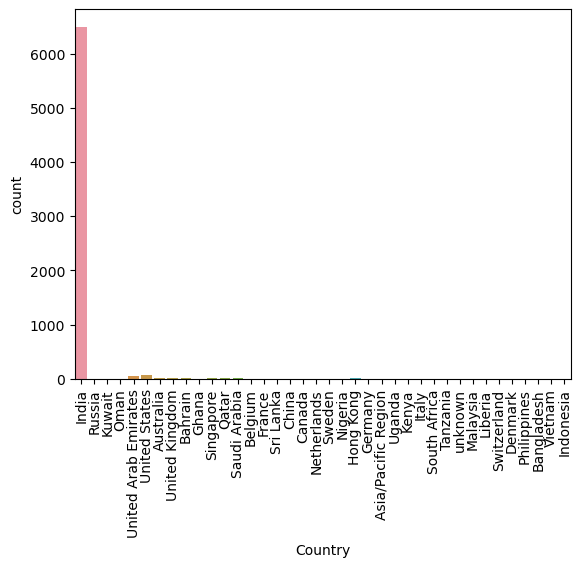

***********************************

Column Name:  How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


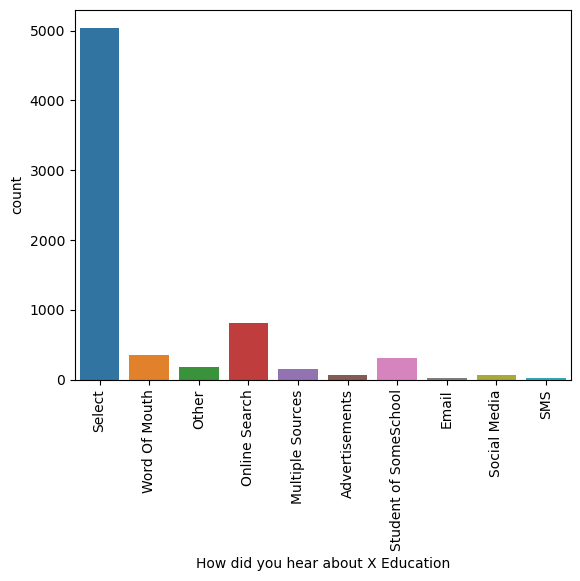

***********************************

Column Name:  Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


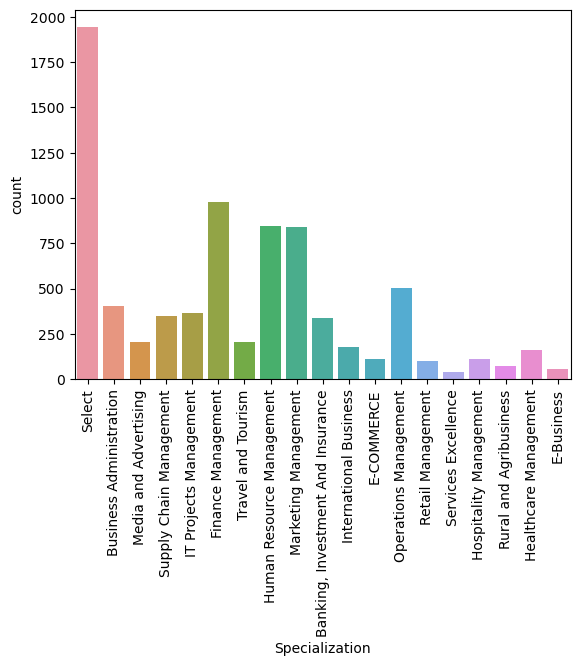

***********************************

Column Name:  City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


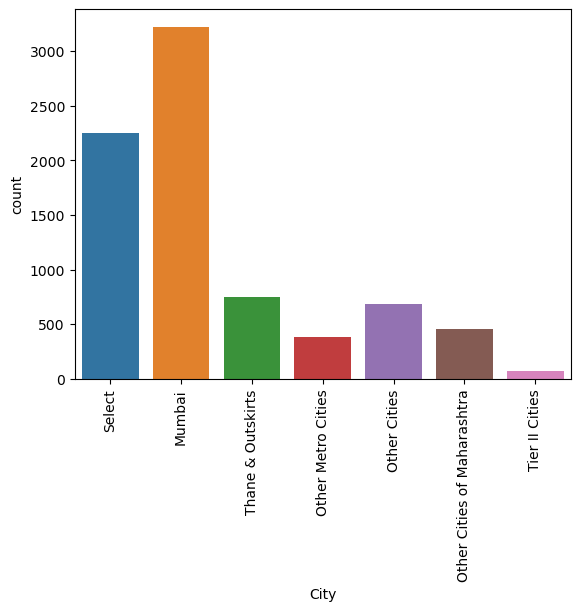

***********************************

Column Name:  Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


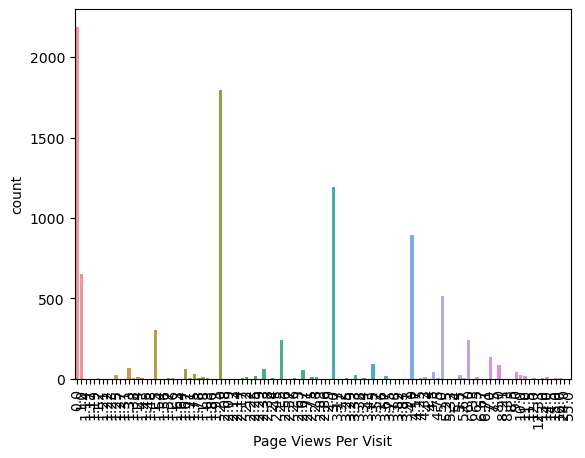

***********************************

Column Name:  TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


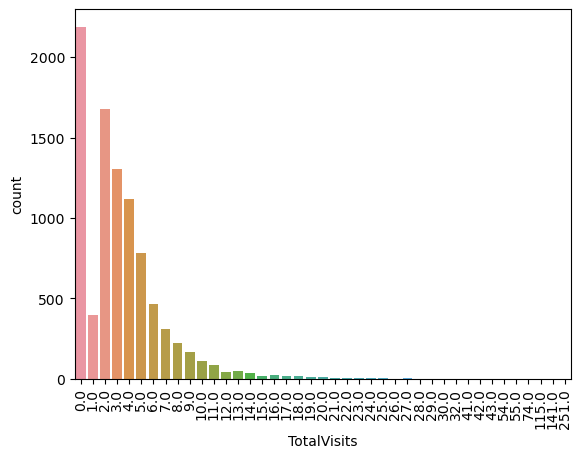

***********************************

Column Name:  Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


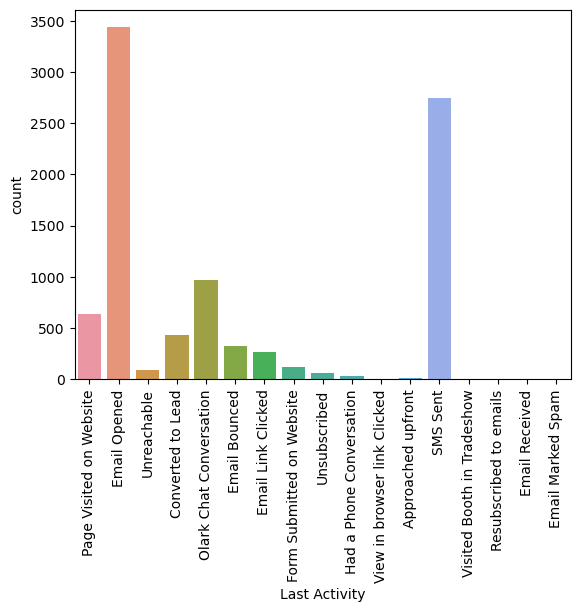

***********************************

Column Name:  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


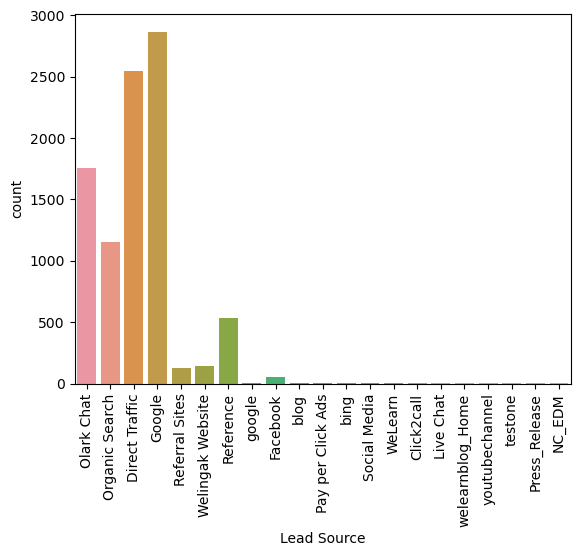

***********************************



In [924]:
#Vaidate the value counts of each column
for i in focuscolumns.index:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    sns.countplot(lead_df[i])
    plt.xticks(rotation = 90)
    plt.show()
    print('***********************************')
    print("")

In [925]:
#These columns have majority of values as not selected. Hence we need to convert this to null.
cols = ['Lead Profile','How did you hear about X Education','Specialization','City']
for i in cols:
    lead_df[i] = lead_df[i].replace('Select',np.nan)

In [926]:
for i in cols:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    print('***********************************')
    print("")

Column Name:  Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
***********************************

Column Name:  How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64
***********************************

Column Name:  Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banki

In [927]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [928]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)

4

In [929]:
nullvalues.index

Index(['How did you hear about X Education', 'Lead Profile', 'City',
       'Specialization'],
      dtype='object')

In [930]:
#Drop these 3 columns which has > 30% of null values. We will leave Specialization as of now.
lead_df.drop(['How did you hear about X Education', 'Lead Profile','Specialization','City'], 1, inplace = True)

In [931]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [932]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
focuscolumns = nullvalues[nullvalues.values > 0]
len(focuscolumns)
#There are 7 columns which still has null values. These columns need to be assessed in detail.

7

In [933]:
focuscolumns

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
dtype: int64

Column Name:  What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


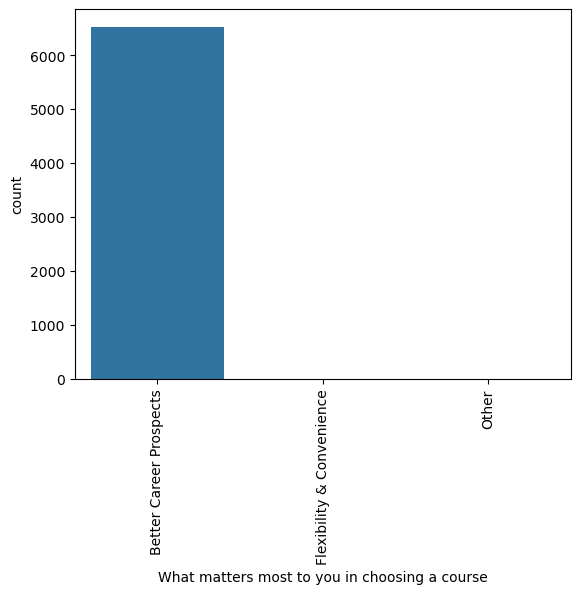

***********************************

Column Name:  What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


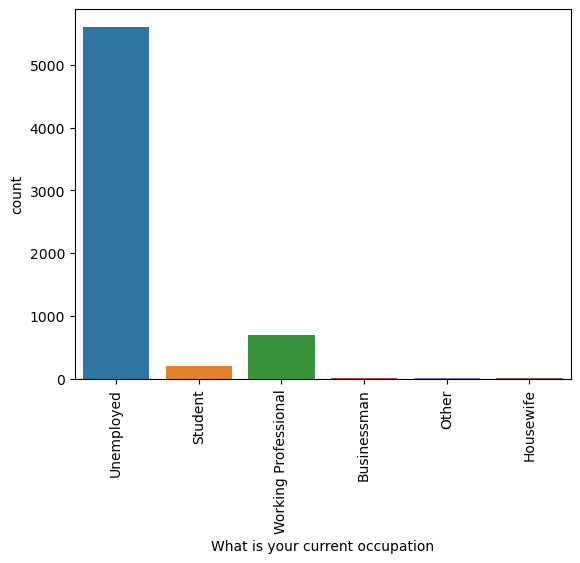

***********************************

Column Name:  Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania     

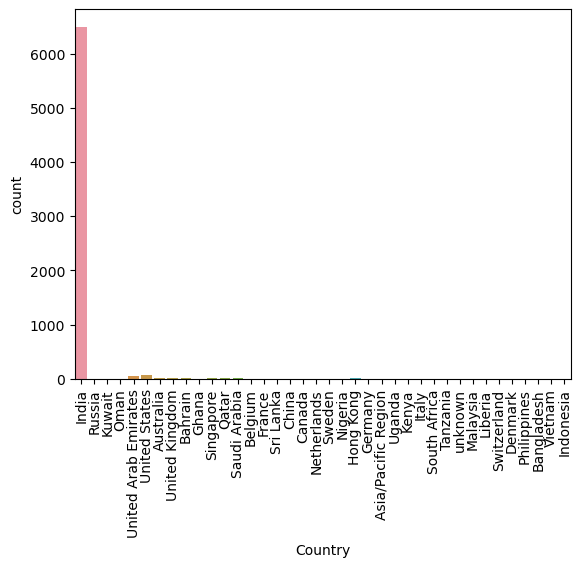

***********************************

Column Name:  TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


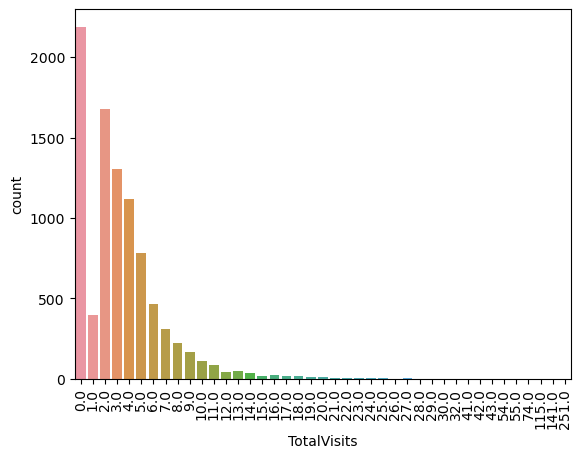

***********************************

Column Name:  Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


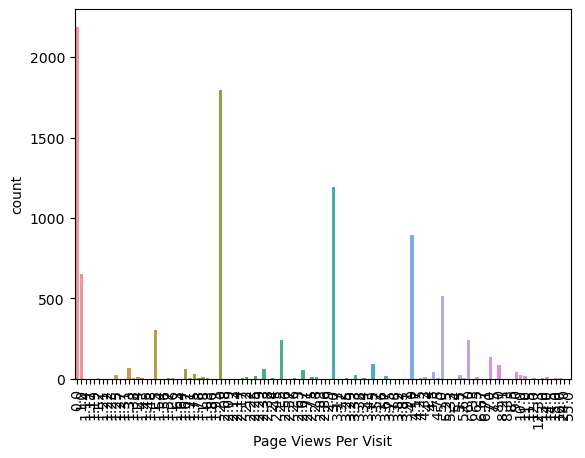

***********************************

Column Name:  Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


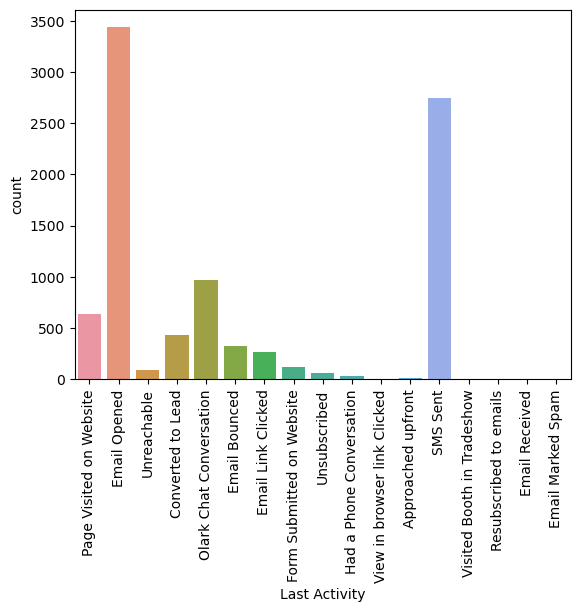

***********************************

Column Name:  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


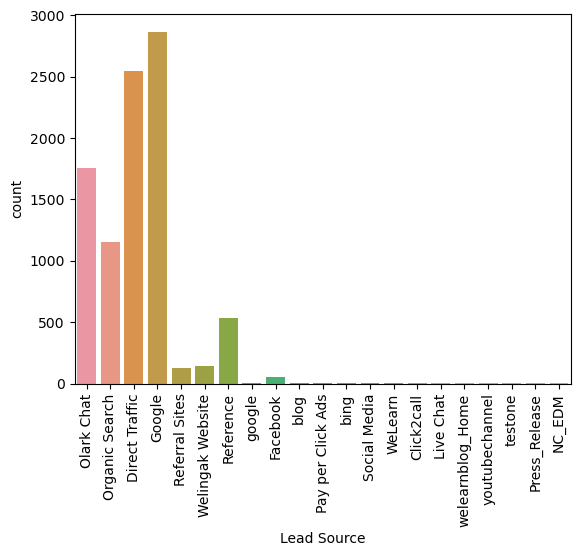

***********************************



In [934]:
#Vaidate the value counts of each column
for i in focuscolumns.index:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    sns.countplot(lead_df[i])
    plt.xticks(rotation = 90)
    plt.show()
    print('***********************************')
    print("")

In [935]:
#As these columns have 1% data as null values, removing the rows
lead_df=lead_df[~pd.isnull(lead_df['TotalVisits'])]
lead_df=lead_df[~pd.isnull(lead_df['Page Views Per Visit'])]
lead_df=lead_df[~pd.isnull(lead_df['Last Activity'])]
lead_df=lead_df[~pd.isnull(lead_df['Lead Source'])]

In [936]:
lead_df.shape

(9074, 27)

In [937]:
#Following one categorical Variables has highly biased data.
#Column 'What matters most to you in choosing a course' has highly biased data. hence drop this column.
lead_df.drop(['What matters most to you in choosing a course'],axis = 1, inplace = True)



In [938]:
# Dropping Country as it is irrelevant to target variable
lead_df.drop(['Country'],axis=1,inplace=True)


In [939]:
#Column 'What is your current occupation' can be imputed by replacing Nulls with most frequent value('Unemployed')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [940]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [941]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [942]:
lead_df.shape

(9074, 25)

In [943]:
#Columns Prospect ID and Lead Number does not have any significant values Hence drop them.
lead_df.drop(['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [944]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified


In [945]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Column Name:  Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


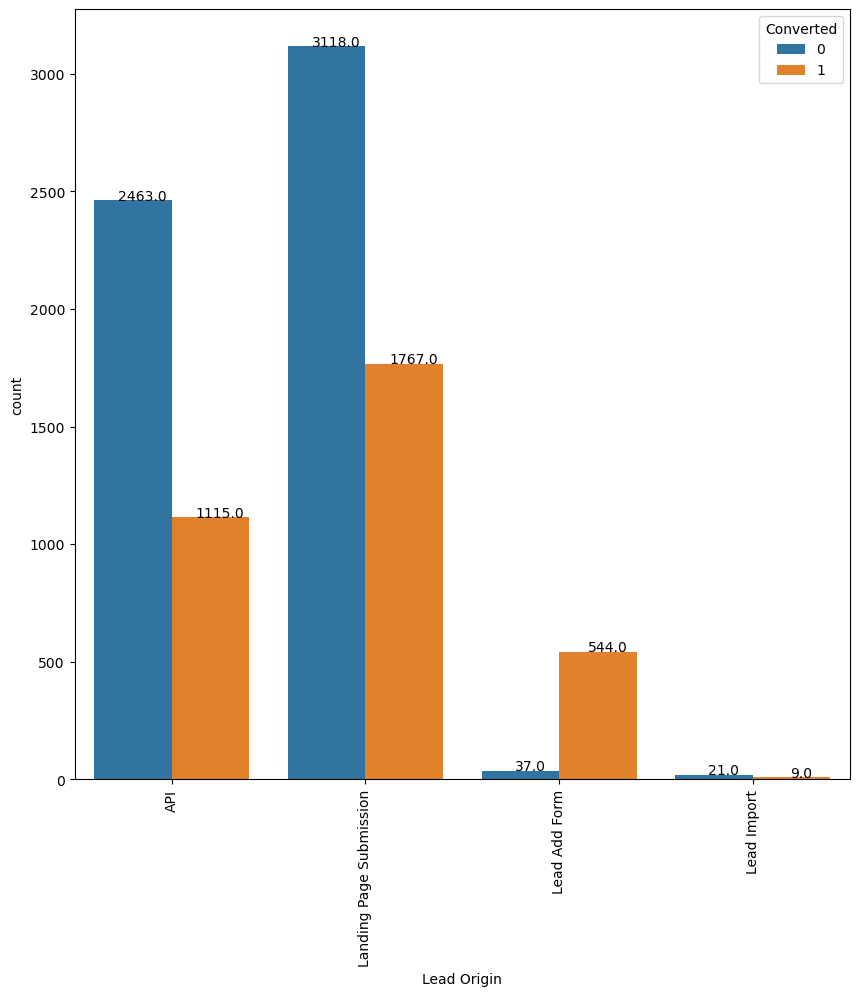

***********************************

Column Name:  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


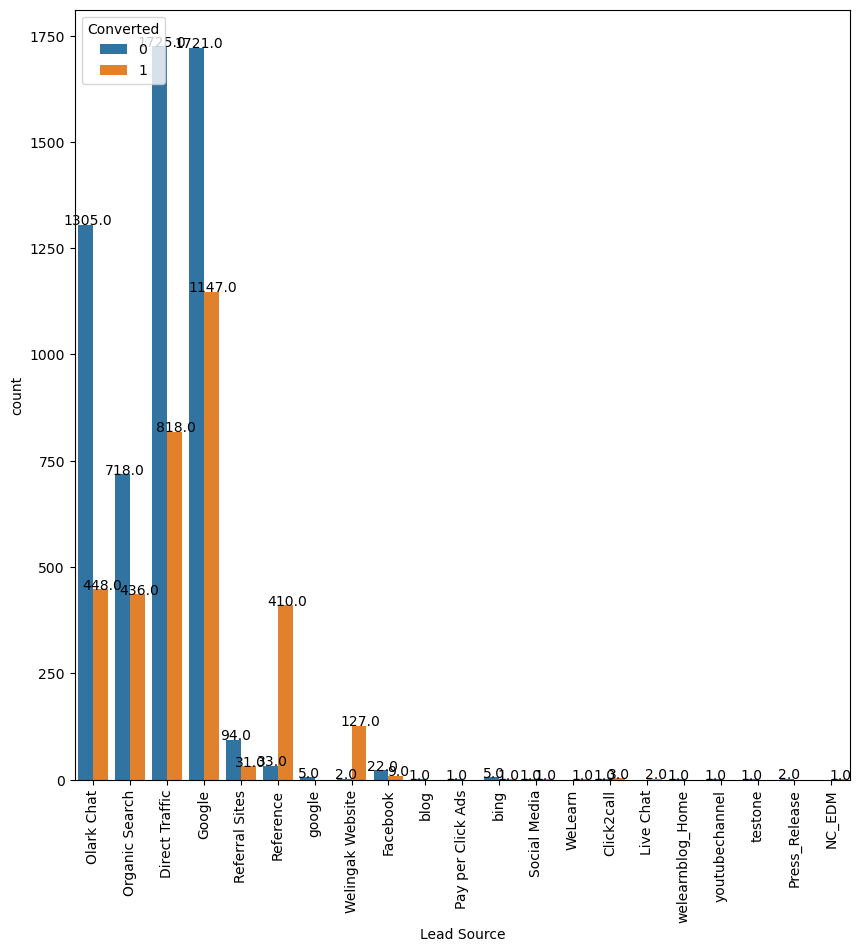

***********************************

Column Name:  Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64


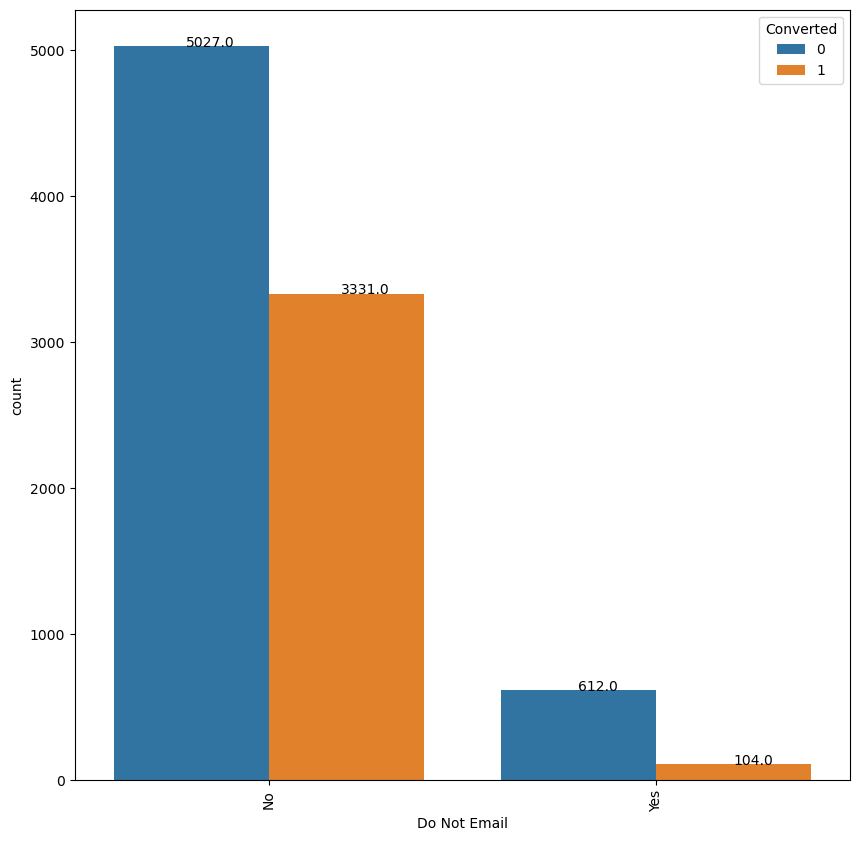

***********************************

Column Name:  Do Not Call
No     9072
Yes       2
Name: Do Not Call, dtype: int64


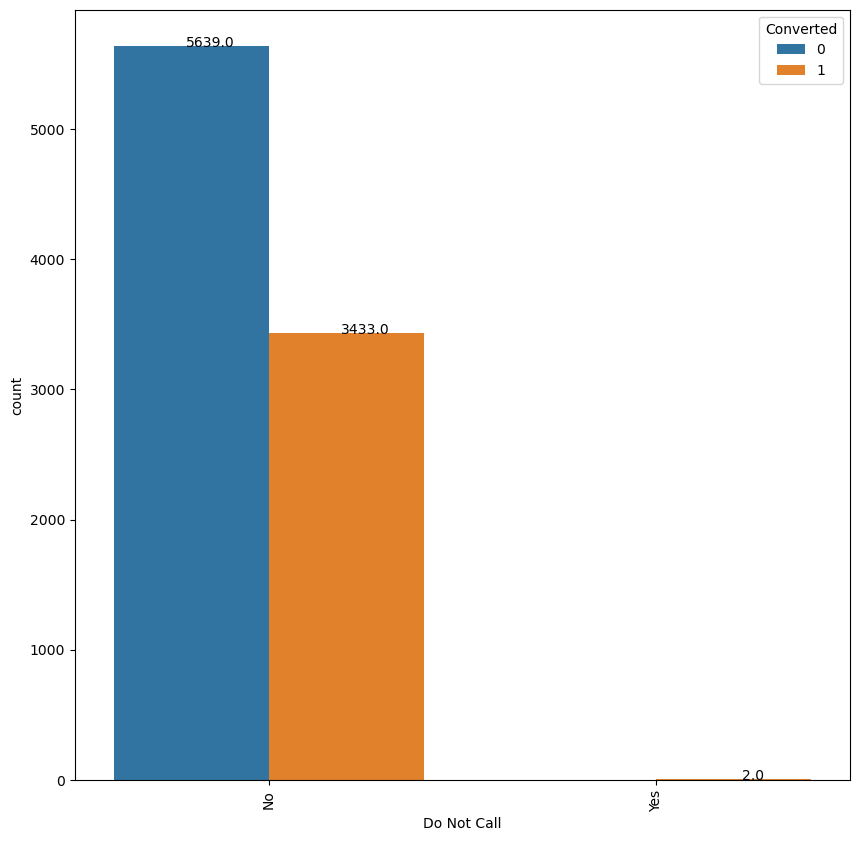

***********************************

Column Name:  Converted
0    5639
1    3435
Name: Converted, dtype: int64


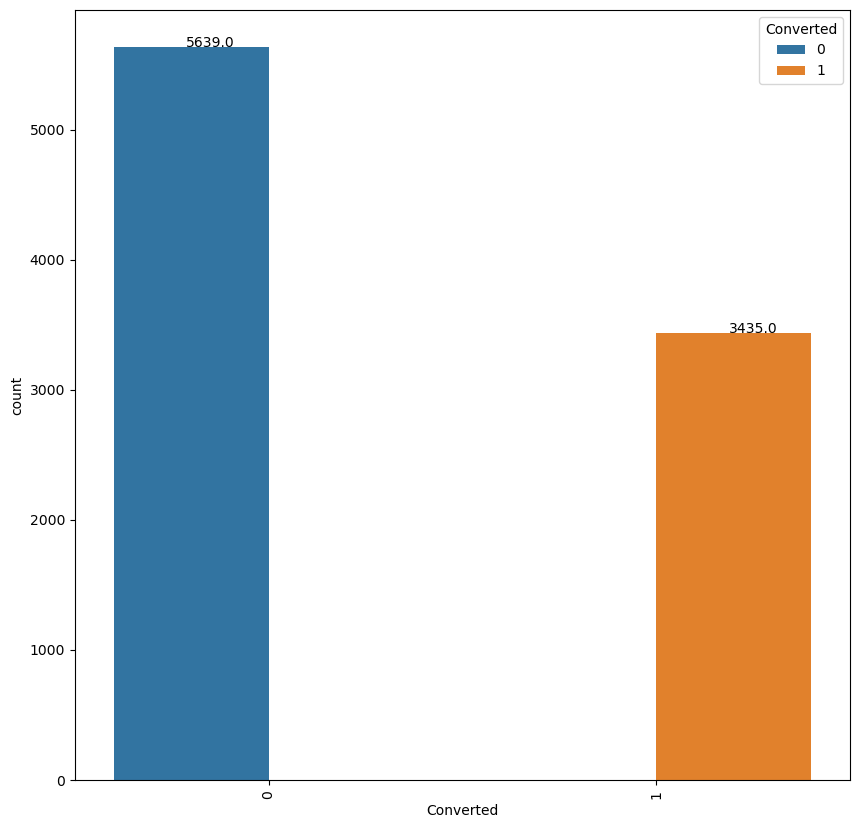

***********************************

Column Name:  TotalVisits
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


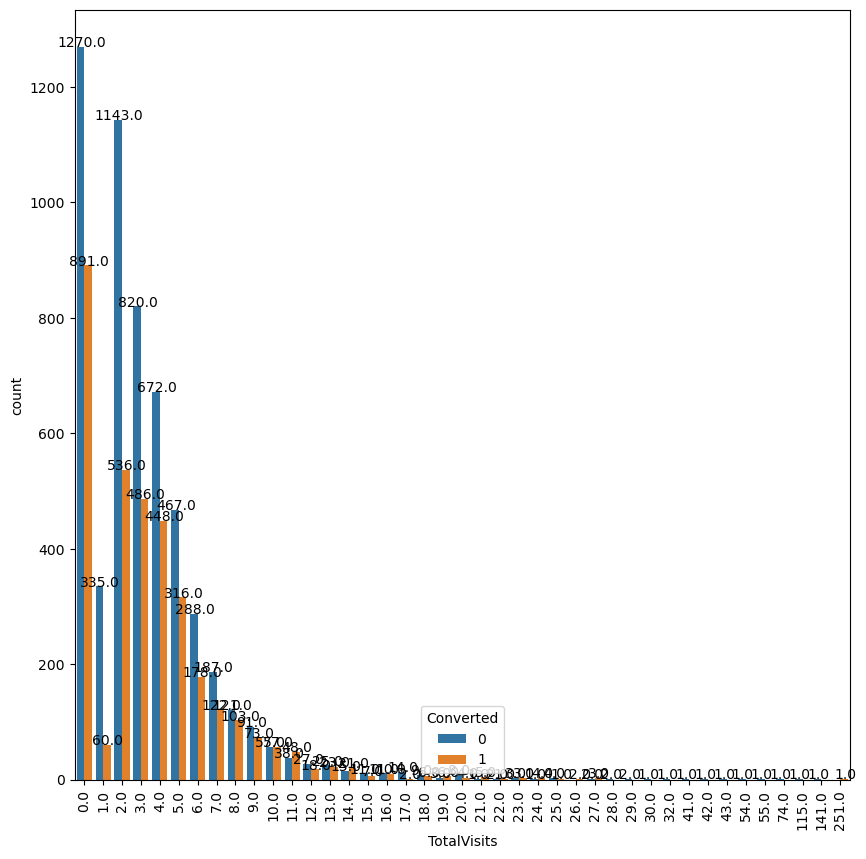

***********************************

Column Name:  Total Time Spent on Website
0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64


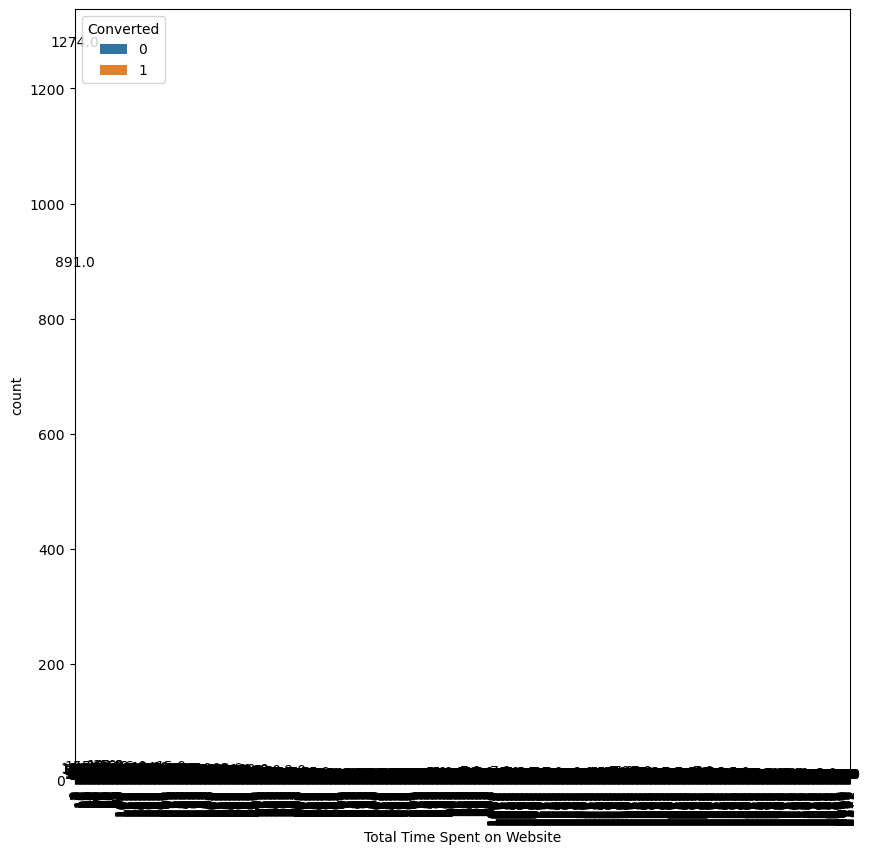

***********************************

Column Name:  Page Views Per Visit
0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


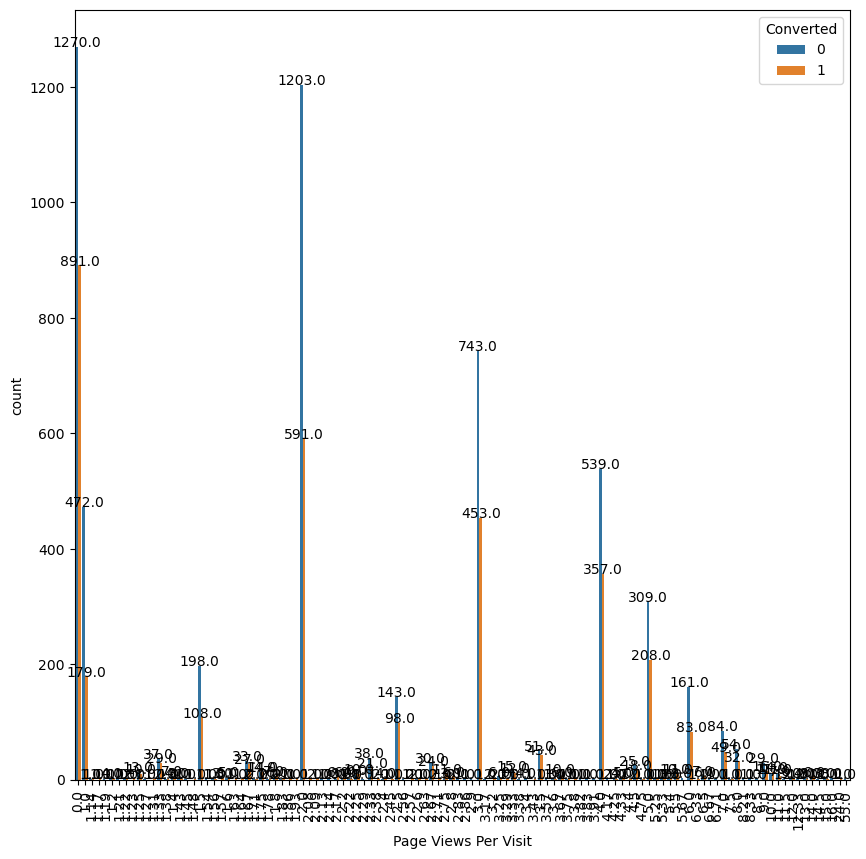

***********************************

Column Name:  Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


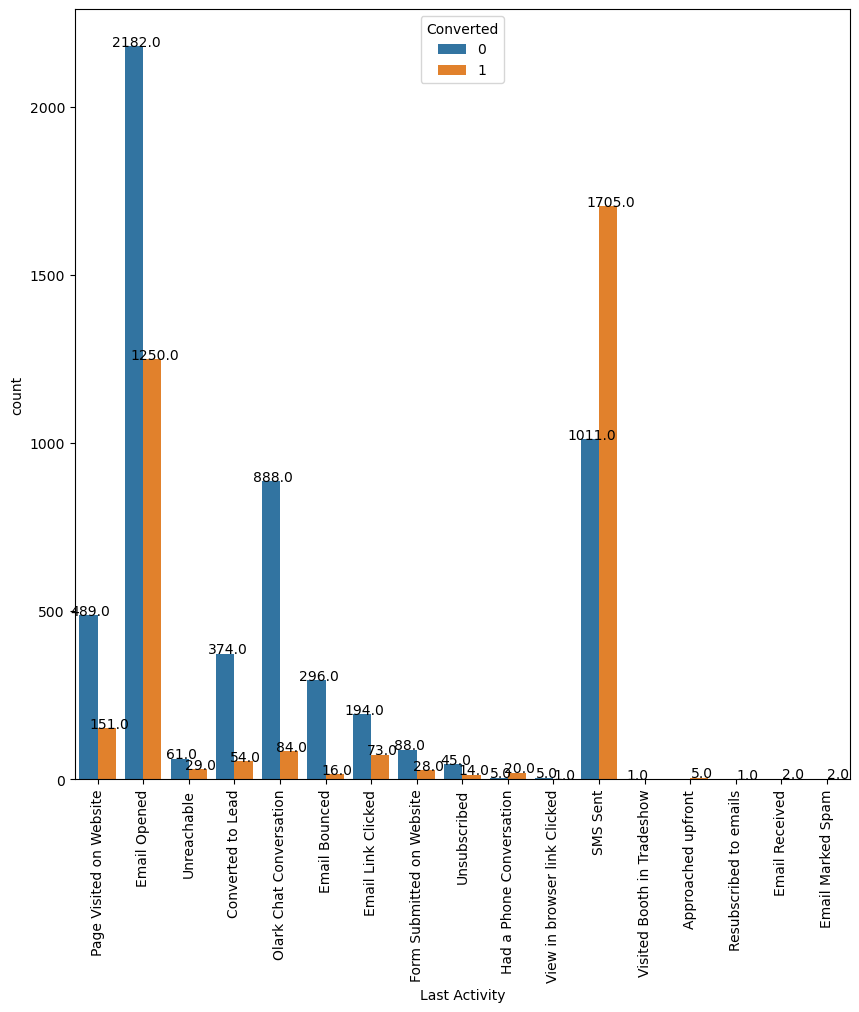

***********************************

Column Name:  What is your current occupation
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


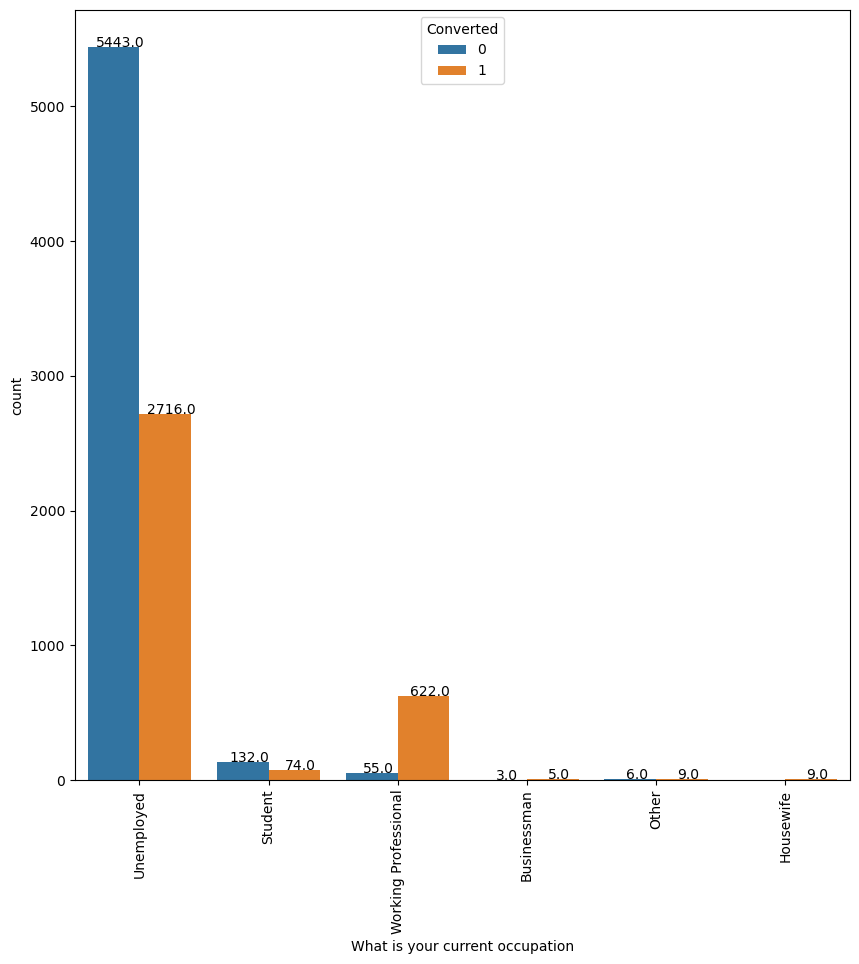

***********************************

Column Name:  Search
No     9060
Yes      14
Name: Search, dtype: int64


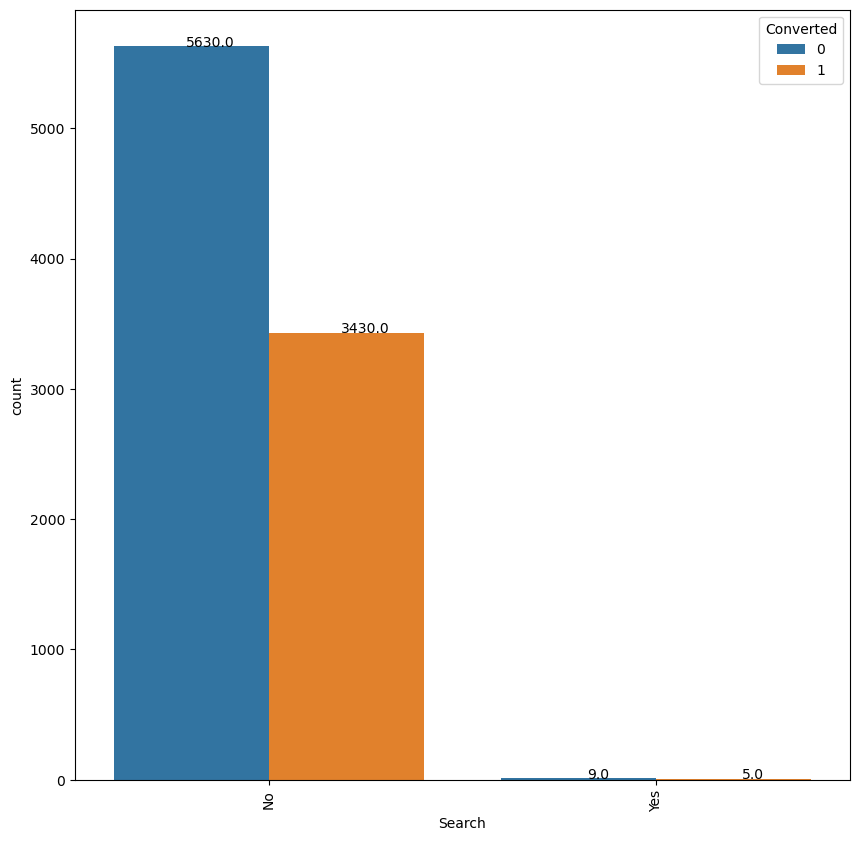

***********************************

Column Name:  Magazine
No    9074
Name: Magazine, dtype: int64


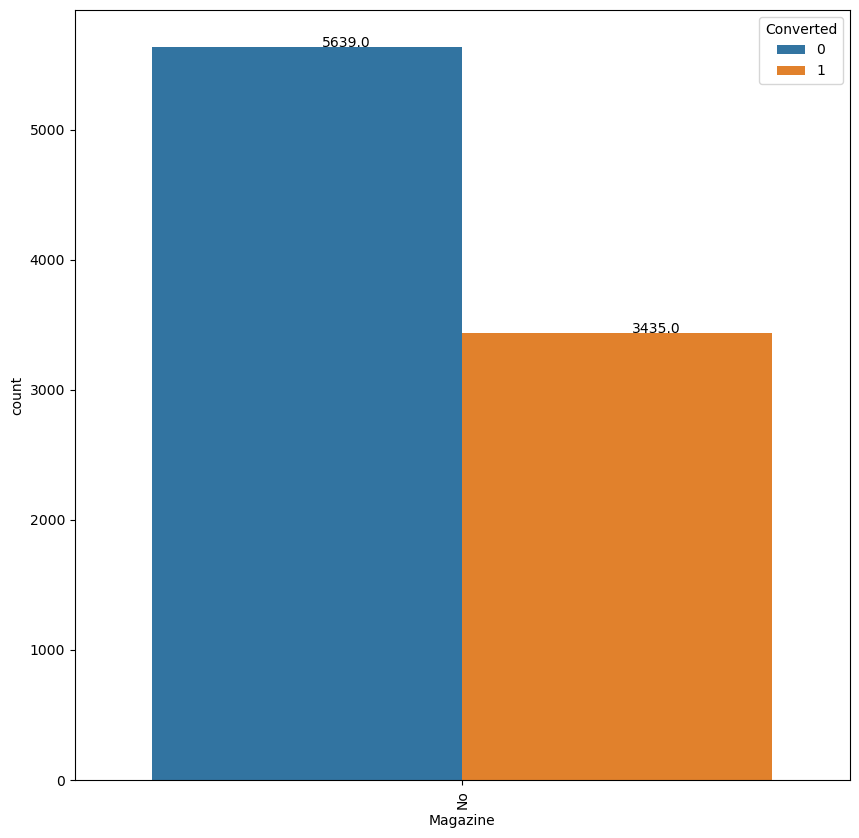

***********************************

Column Name:  Newspaper Article
No     9072
Yes       2
Name: Newspaper Article, dtype: int64


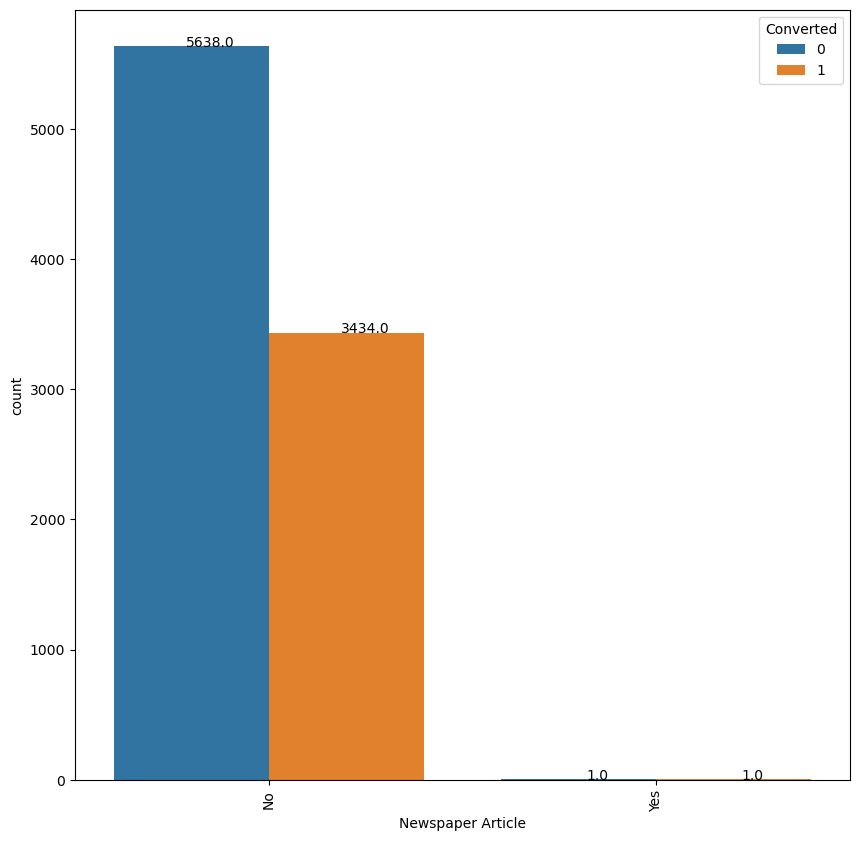

***********************************

Column Name:  X Education Forums
No     9073
Yes       1
Name: X Education Forums, dtype: int64


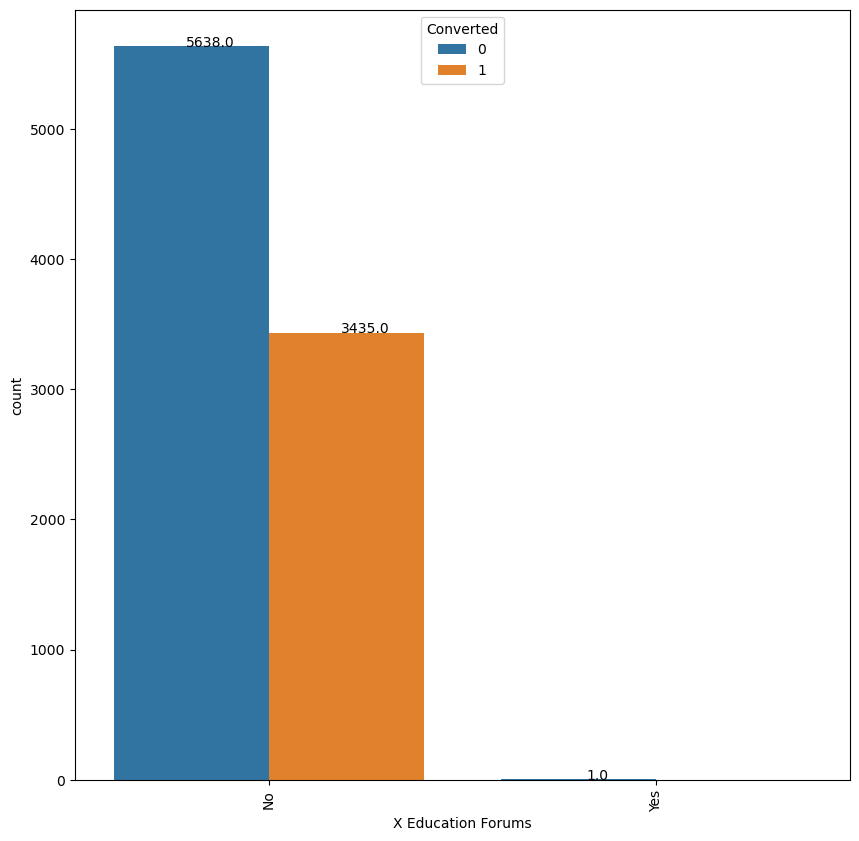

***********************************

Column Name:  Newspaper
No     9073
Yes       1
Name: Newspaper, dtype: int64


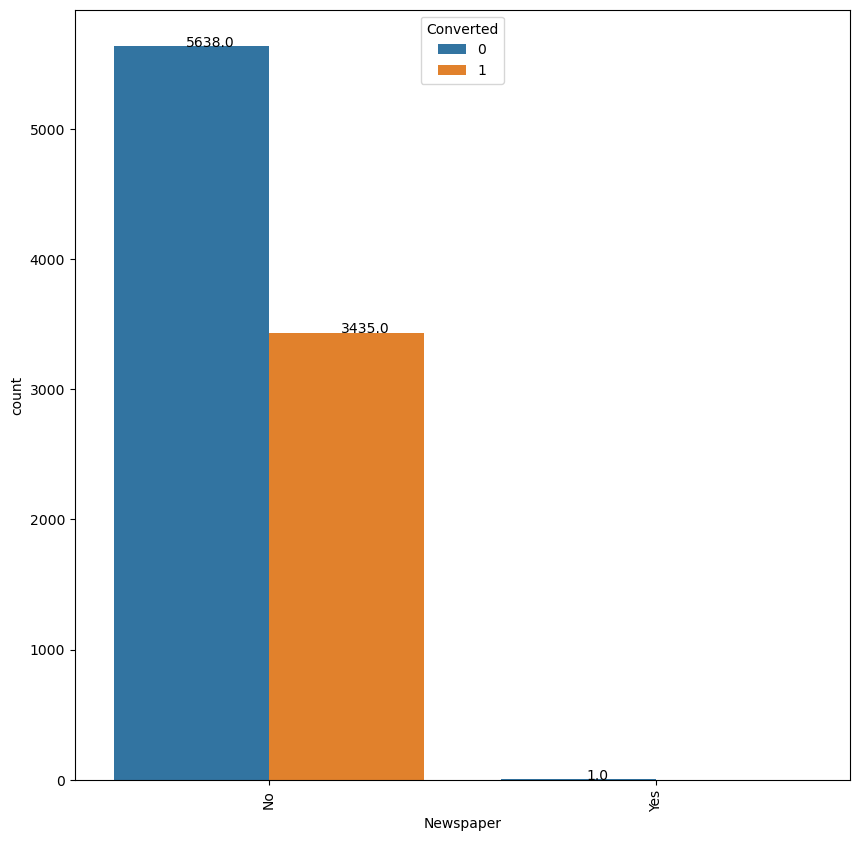

***********************************

Column Name:  Digital Advertisement
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64


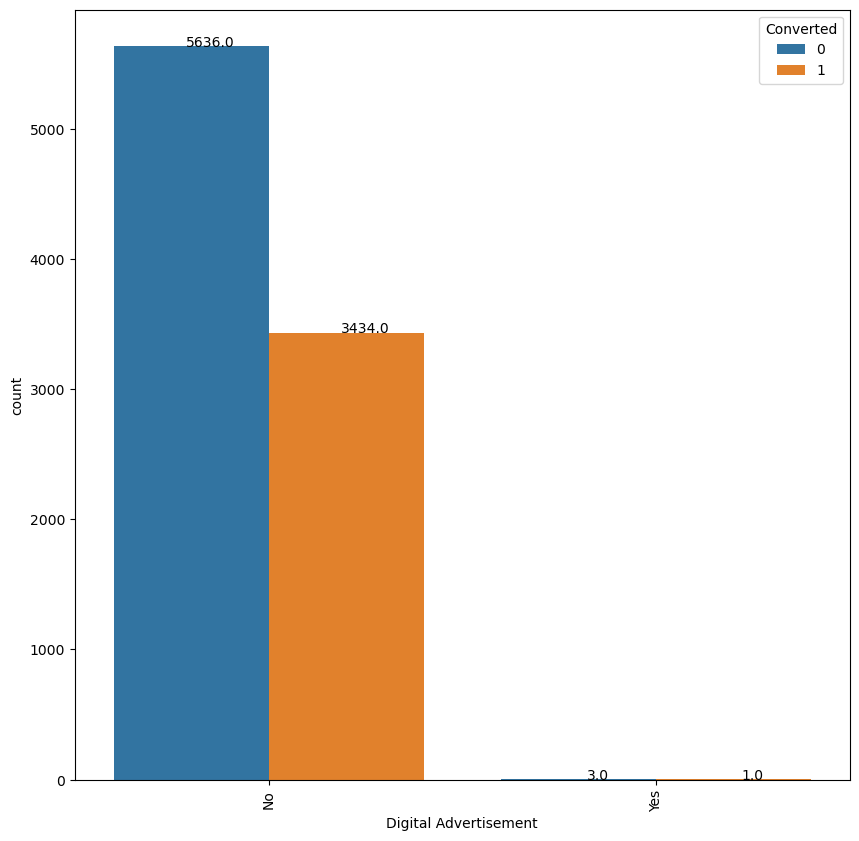

***********************************

Column Name:  Through Recommendations
No     9067
Yes       7
Name: Through Recommendations, dtype: int64


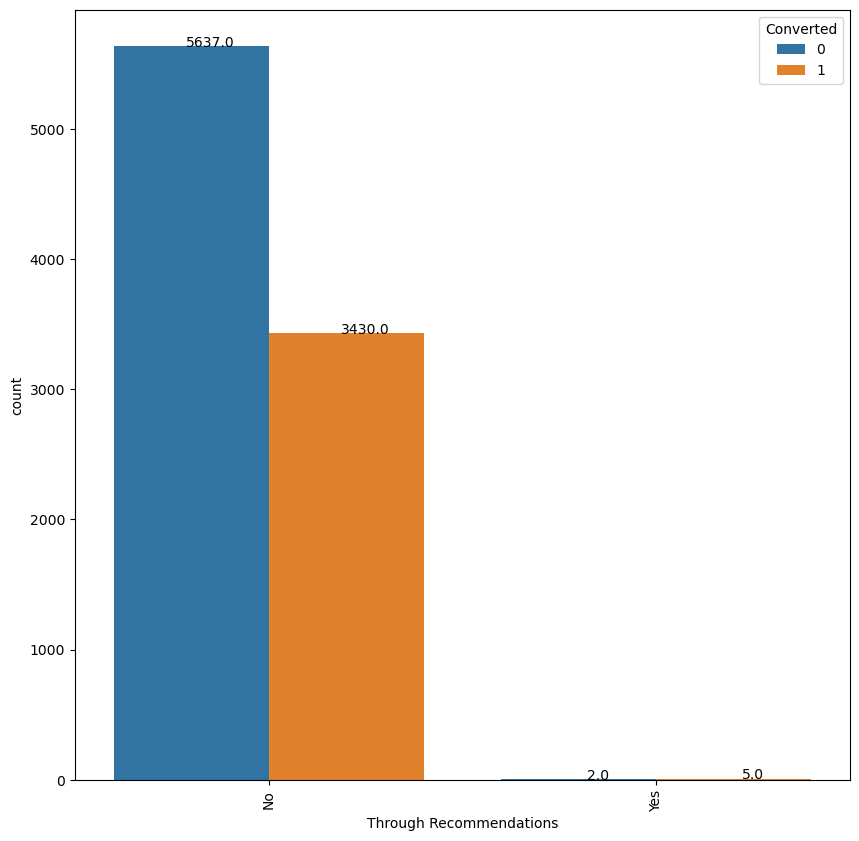

***********************************

Column Name:  Receive More Updates About Our Courses
No    9074
Name: Receive More Updates About Our Courses, dtype: int64


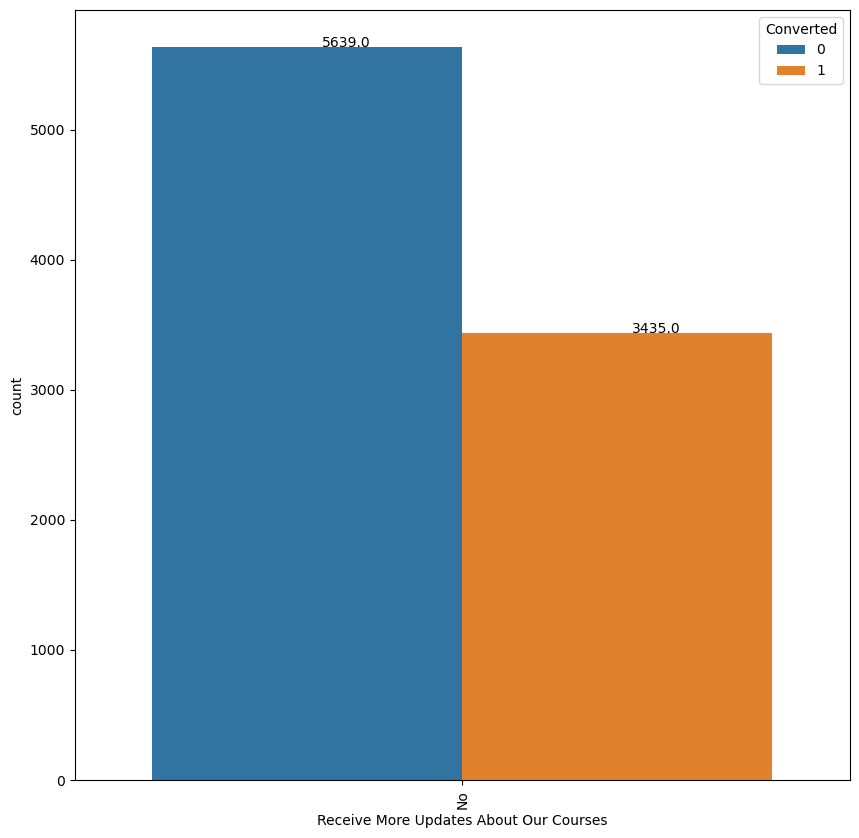

***********************************

Column Name:  Update me on Supply Chain Content
No    9074
Name: Update me on Supply Chain Content, dtype: int64


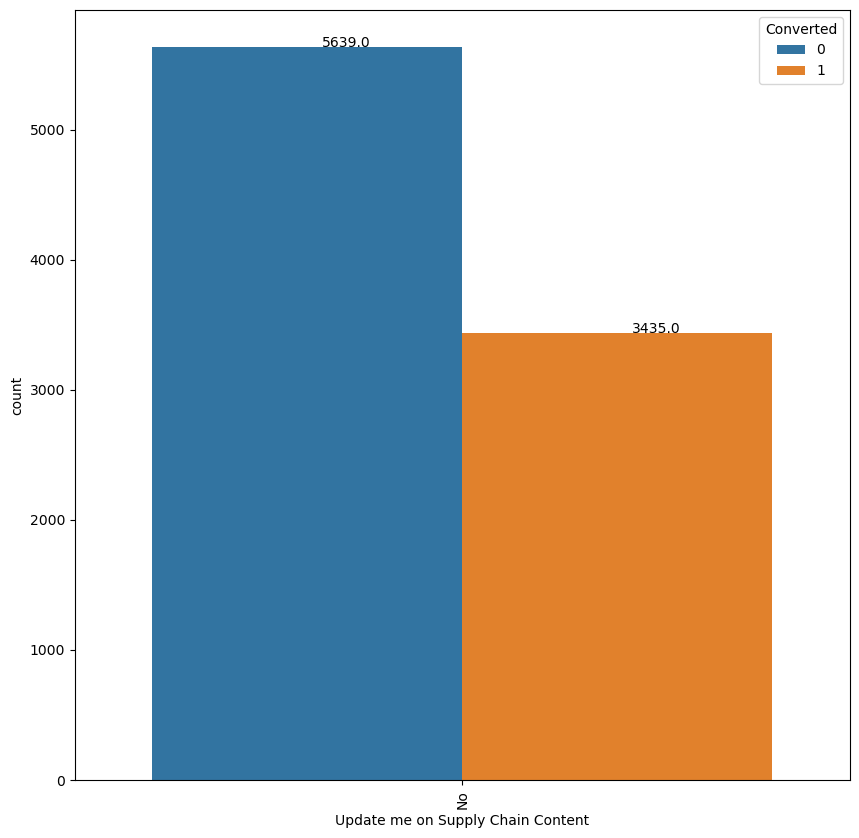

***********************************

Column Name:  Get updates on DM Content
No    9074
Name: Get updates on DM Content, dtype: int64


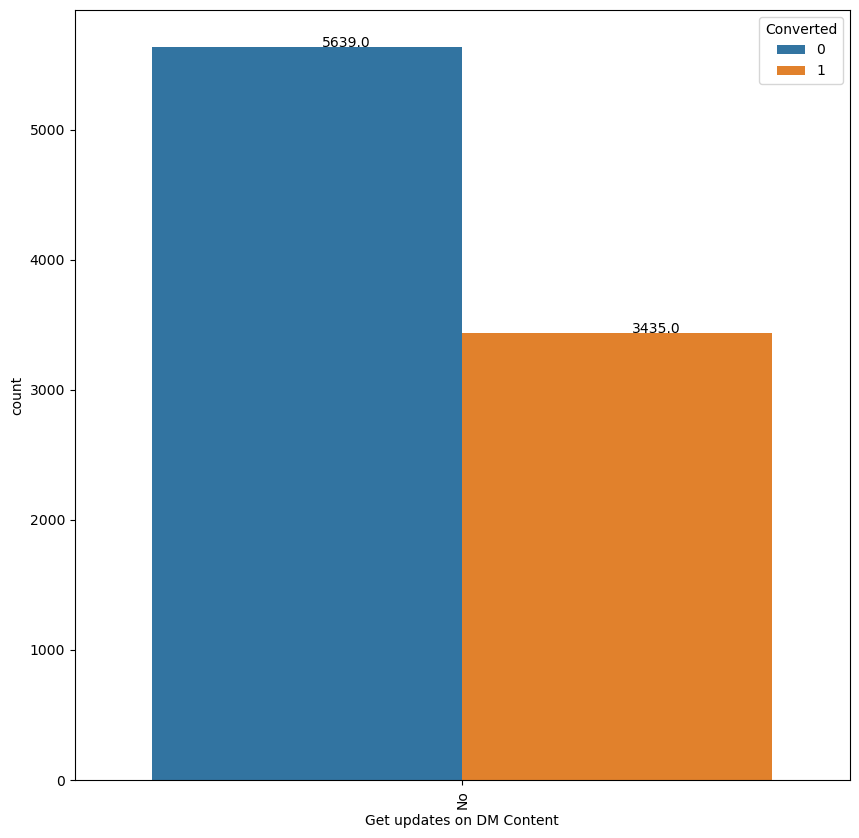

***********************************

Column Name:  I agree to pay the amount through cheque
No    9074
Name: I agree to pay the amount through cheque, dtype: int64


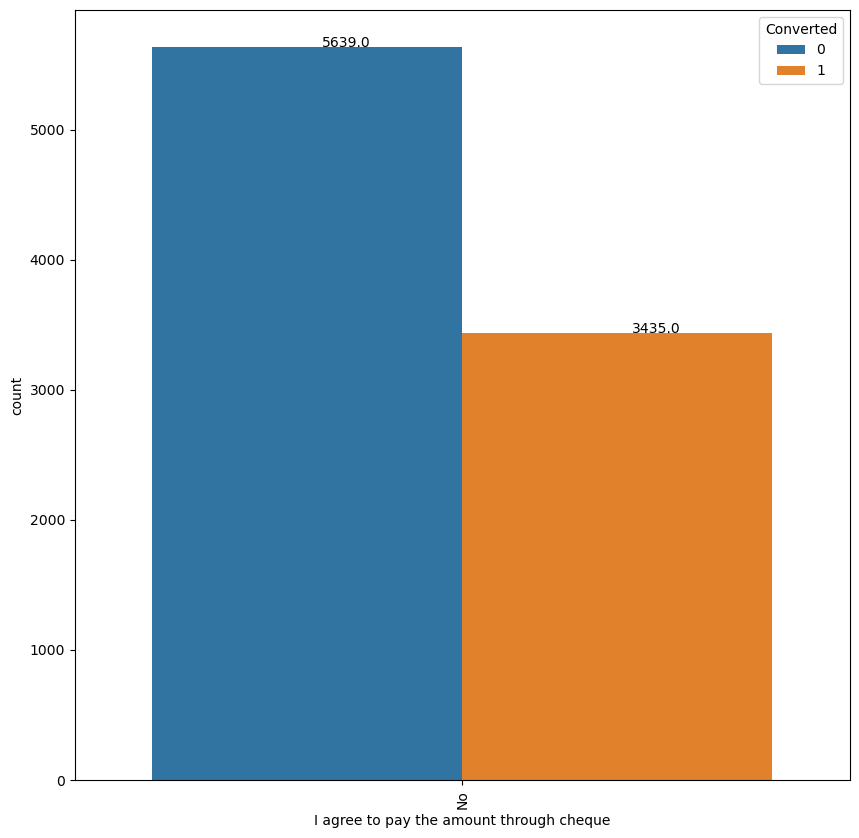

***********************************

Column Name:  A free copy of Mastering The Interview
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


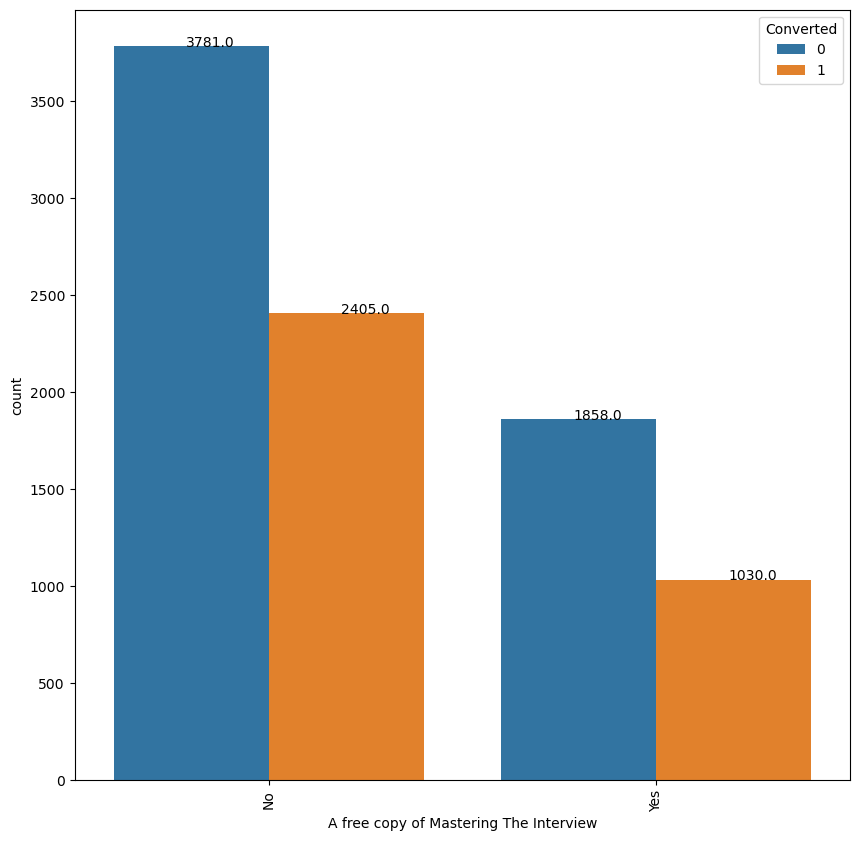

***********************************

Column Name:  Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


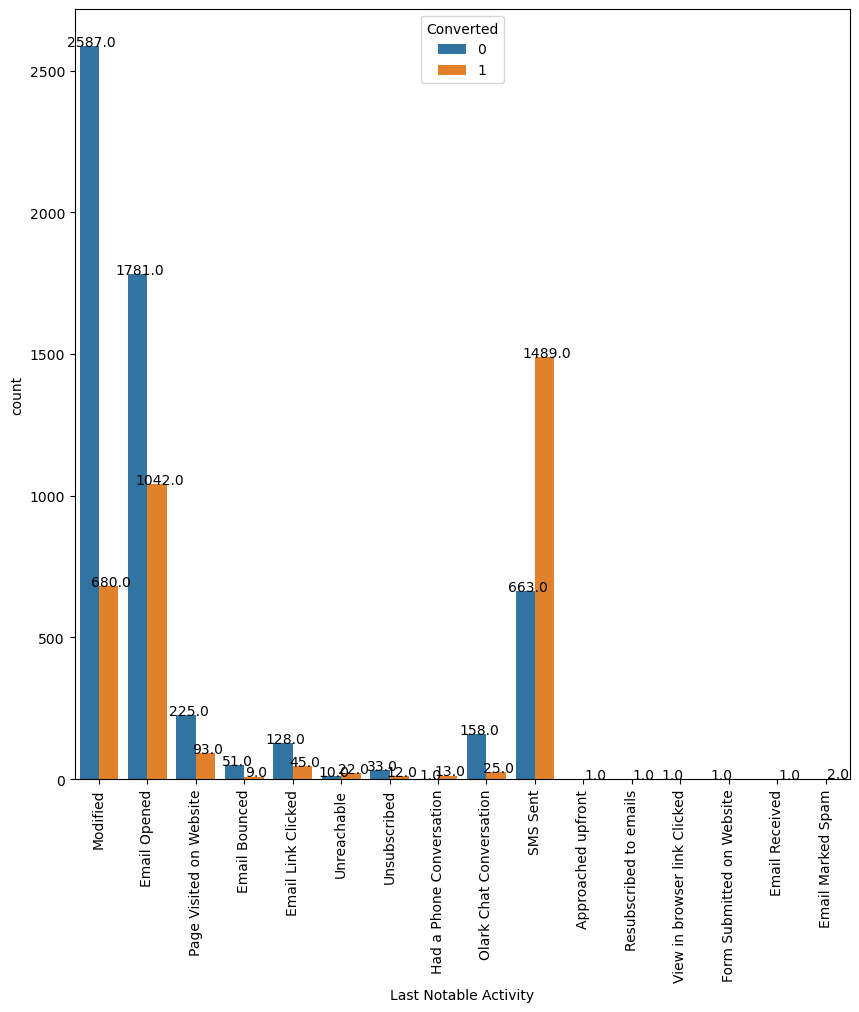

***********************************



In [946]:
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

#Vaidate the value counts of each column
for i in cols:
    plt.figure(figsize=(10,10))
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    #sns.countplot(lead_df[i])
    #sns.countplot(data = lead_df, x= i, hue ='Converted')
    ax = sns.countplot(data = lead_df, x= i, hue ='Converted')
    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()
    print('***********************************')
    print("")
    



    
    

In [947]:
# The following columns need to be dropped since there is only one value which is used for majority of the rows. 
# They wont have much of any predictive power
colstodrop = ['Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']

lead_df.drop(colstodrop,axis = 1, inplace = True)

In [948]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [949]:
lead_df.shape

(9074, 11)

## Step 4: Visualising the Data using EDA


In [950]:
lead_df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [951]:
# Check the columns which are of type 'object'
temp = lead_df.loc[:, lead_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [952]:
# Check the columns which are numerical
temp = lead_df.loc[:, lead_df.dtypes != 'object']
temp.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [953]:
numericCols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

categoricCols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']


In [954]:
lead_df[numericCols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


In [955]:
#Columns TotalVisits and Page Views Per Visit seems to have some outlier values which can be handled while scaling

Mean 3.456028212475204
Median 3.0
Mode 0.0
25% quantile:  1.0
50% quantile:  3.0
75% quantile:  5.0
90% quantile:  7.0
95% quantile:  10.0
99% quantile:  17.0
100th quantile:  0.0
 


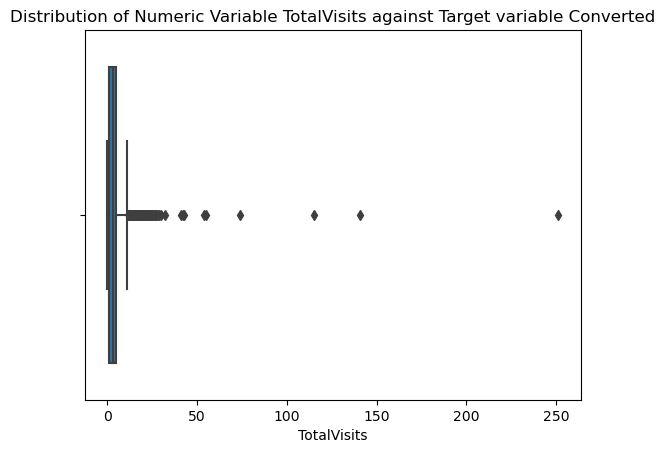

Mean 482.8874807141283
Median 246.0
Mode 0
25% quantile:  11.0
50% quantile:  246.0
75% quantile:  922.75
90% quantile:  1373.0
95% quantile:  1557.0
99% quantile:  1839.0
100th quantile:  0.0
 


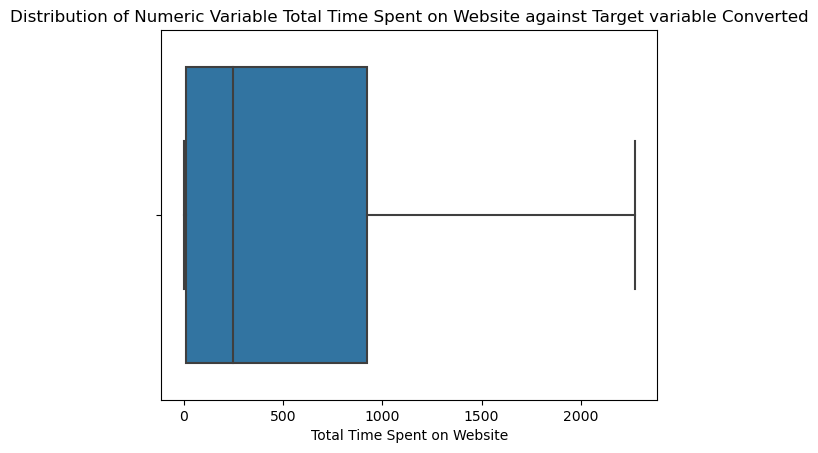

Mean 2.370150980824334
Median 2.0
Mode 0.0
25% quantile:  1.0
50% quantile:  2.0
75% quantile:  3.2
90% quantile:  5.0
95% quantile:  6.0
99% quantile:  9.0
100th quantile:  0.0
 


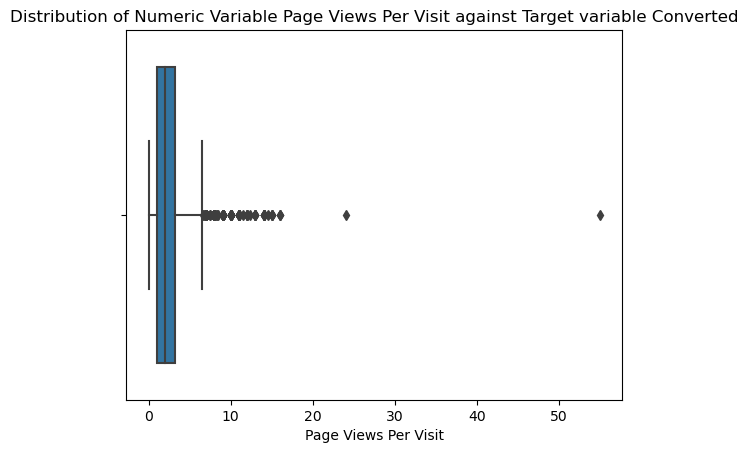

In [956]:
#Plot numerical variables
# Draw box plots for numeric variables with continuous values to identify if there are major outliers
for i in numericCols:
    print('Mean',lead_df[i].mean())
    print('Median',lead_df[i].median())
    print('Mode',lead_df[i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[i], .25))   
    print("50% quantile: ", np.quantile(lead_df[i], .50))
    print("75% quantile: ", np.quantile(lead_df[i], .75))
    print("90% quantile: ", np.quantile(lead_df[i], .90))
    print("95% quantile: ", np.quantile(lead_df[i], .95))    
    print("99% quantile: ", np.quantile(lead_df[i], .99))  
    print("100th quantile: ", np.quantile(lead_df[i], .1))
    print(" ")
    sns.boxplot(lead_df[i])
    plt.title("Distribution of Numeric Variable " + str(i) + " against Target variable Converted")
    plt.show()
    

In [957]:
#Drop records with outlier values
high_quantile = np.quantile(lead_df['TotalVisits'], .99)
lead_df = lead_df[lead_df['TotalVisits'] < high_quantile]

In [958]:
#Drop records with outlier values
high_quantile = np.quantile(lead_df['Page Views Per Visit'], .99)
lead_df = lead_df[lead_df['Page Views Per Visit'] < high_quantile]

In [959]:
lead_df[lead_df['Converted']==0].head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
5,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,No,Modified
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,No,Modified


Target 1
Mean 3.2975231274246495
Median 3.0
Mode 0.0
25% quantile:  0.0
50% quantile:  3.0
75% quantile:  5.0
90% quantile:  7.0
95% quantile:  9.0
99% quantile:  13.0
100th quantile:  0.0
 
Target 0
Mean 2.977322206095791
Median 3.0
Mode 0.0
25% quantile:  1.0
50% quantile:  3.0
75% quantile:  4.0
90% quantile:  6.0
95% quantile:  8.0
99% quantile:  12.0
100th quantile:  0.0
 


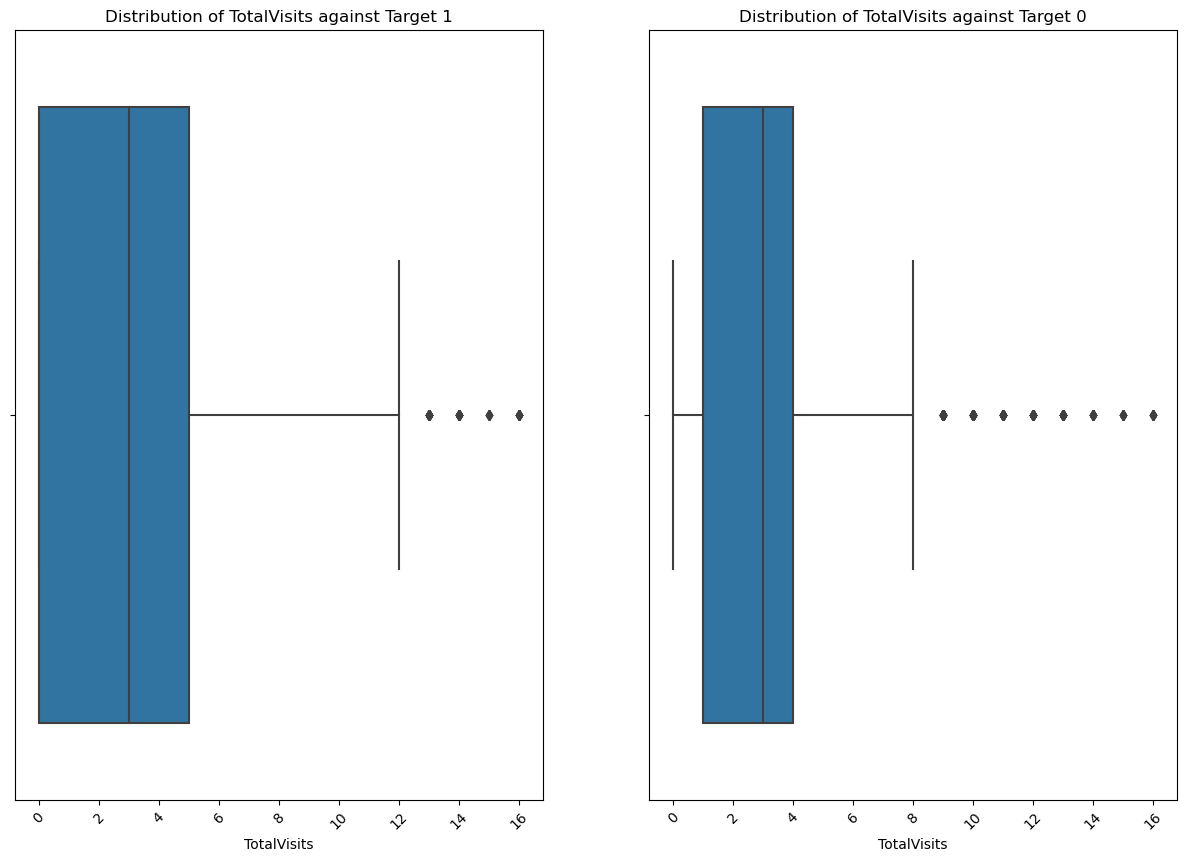

Target 1
Mean 726.834676216055
Median 814.0
Mode 0
25% quantile:  0.0
50% quantile:  814.0
75% quantile:  1263.5
90% quantile:  1530.0
95% quantile:  1667.5
99% quantile:  1882.0
100th quantile:  0.0
 
Target 0
Mean 326.91835994194486
Median 176.0
Mode 0
25% quantile:  12.0
50% quantile:  176.0
75% quantile:  390.25
90% quantile:  1080.7000000000016
95% quantile:  1374.3499999999995
99% quantile:  1729.2300000000023
100th quantile:  0.0
 


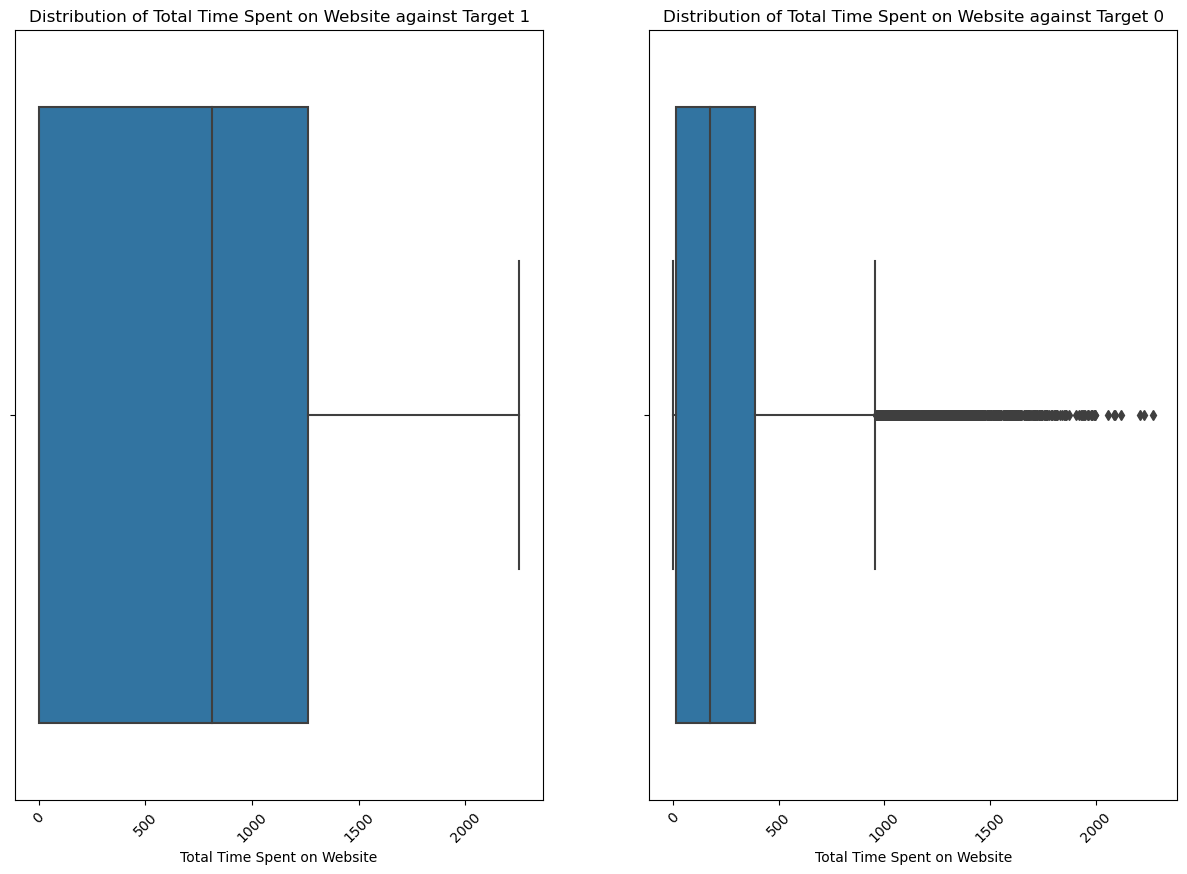

Target 1
Mean 2.2363413906296628
Median 2.0
Mode 0.0
25% quantile:  0.0
50% quantile:  2.0
75% quantile:  3.0
90% quantile:  5.0
95% quantile:  6.0
99% quantile:  7.0
100th quantile:  0.0
 
Target 0
Mean 2.2373058780841792
Median 2.0
Mode 0.0
25% quantile:  1.0
50% quantile:  2.0
75% quantile:  3.0
90% quantile:  5.0
95% quantile:  6.0
99% quantile:  7.0
100th quantile:  0.0
 


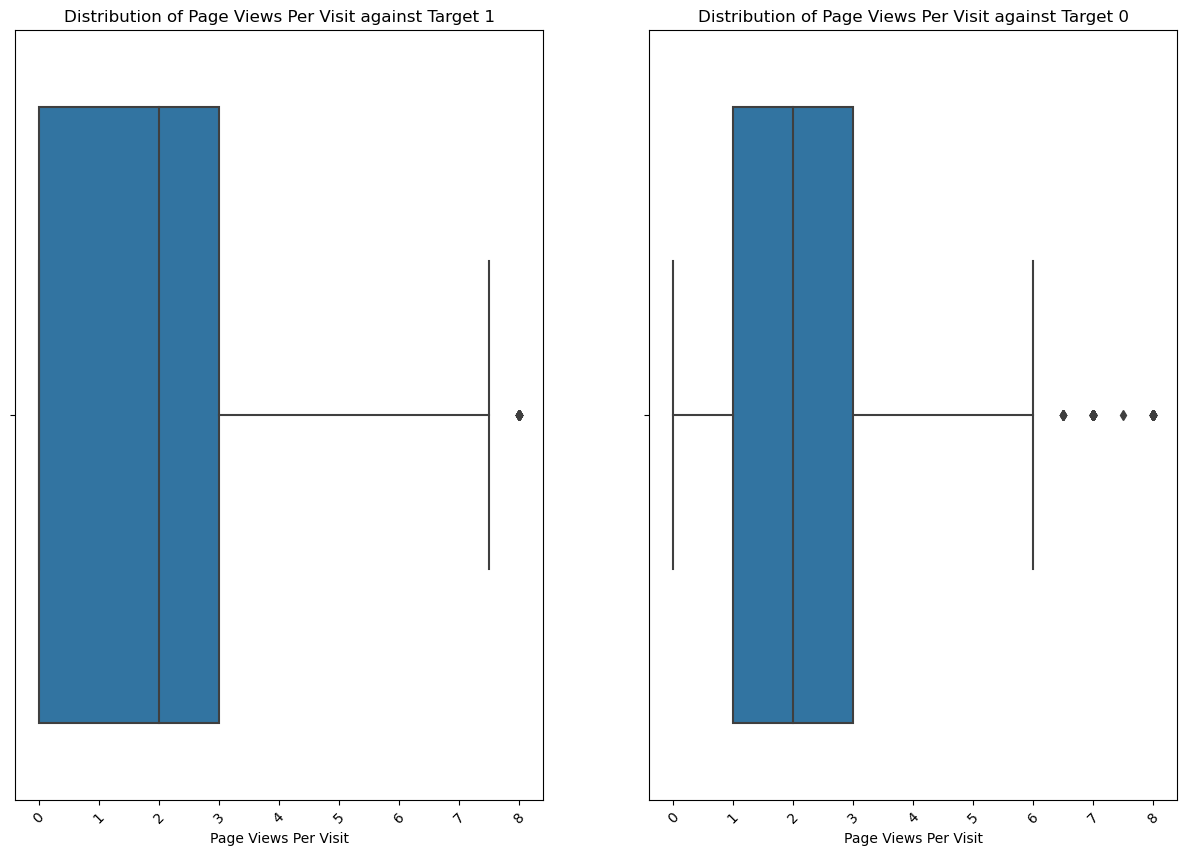

In [960]:
#Plot numerical variables
# Draw box plots for numeric variables with continuous values to identify if there are major outliers
for i in numericCols:
    print("Target 1")
    print('Mean',lead_df[lead_df['Converted']==1][i].mean())
    print('Median',lead_df[lead_df['Converted']==1][i].median())
    print('Mode',lead_df[lead_df['Converted']==1][i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .25))   
    print("50% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .50))
    print("75% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .75))
    print("90% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .90))
    print("95% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .95))    
    print("99% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .99))  
    print("100th quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .1))
    print(" ")
    
    print("Target 0")
    print('Mean',lead_df[lead_df['Converted']==0][i].mean())
    print('Median',lead_df[lead_df['Converted']==0][i].median())
    print('Mode',lead_df[lead_df['Converted']==0][i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .25))   
    print("50% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .50))
    print("75% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .75))
    print("90% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .90))
    print("95% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .95))    
    print("99% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .99))  
    print("100th quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .1))
    print(" ")
    
    #sns.boxplot(lead_df[i])
    #plt.title("Distribution of Numeric Variable " + str(i) + " against Target variable Converted")
    #plt.show()
    
    plt.figure(figsize = (15,10))
    plt.subplot(1,2,1)
    sns.boxplot(lead_df[lead_df['Converted']==1][i])
    plt.xticks(rotation = 45)
    plt.title("Distribution of " + str(i) + " against Target 1")
    
    plt.subplot(1,2,2)
    sns.boxplot(lead_df[lead_df['Converted']==0][i])
    plt.xticks(rotation = 45)
    plt.title("Distribution of " + str(i) + " against Target 0")
    
    plt.show()

In [961]:
lead_df[numericCols].describe()
# The values look okay. No major outliers observed.

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000
mean,3.098387,478.122193,2.236941
std,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,3.000000,240.000000,2.000000
75%,4.000000,913.000000,3.000000
max,16.000000,2272.000000,8.000000


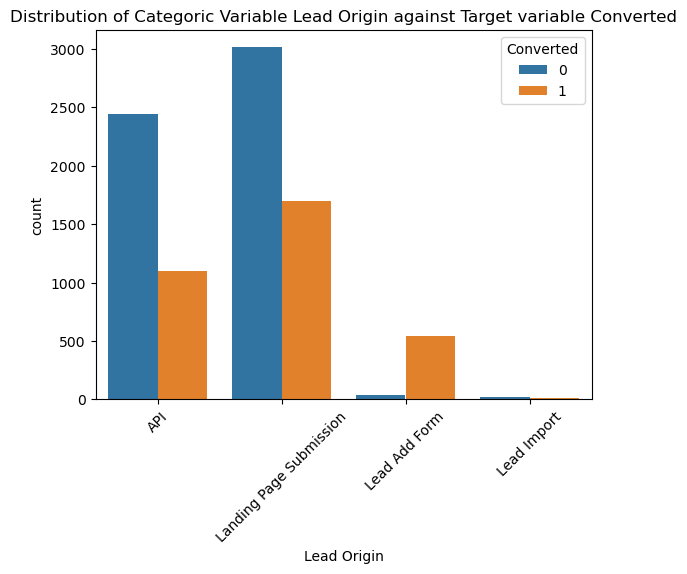

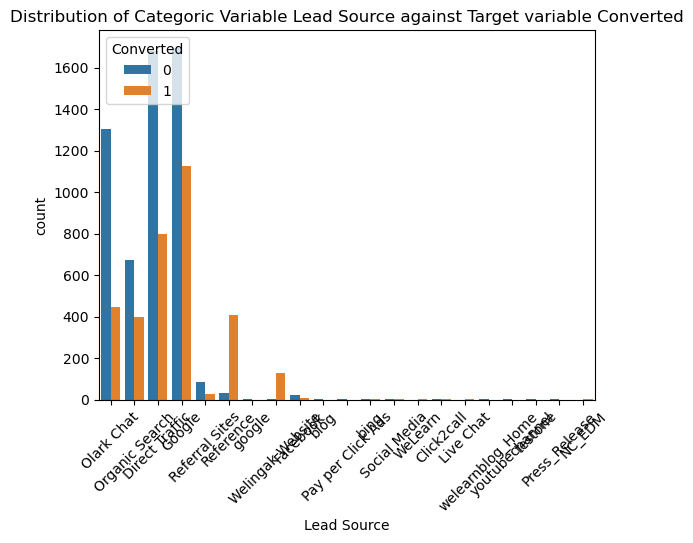

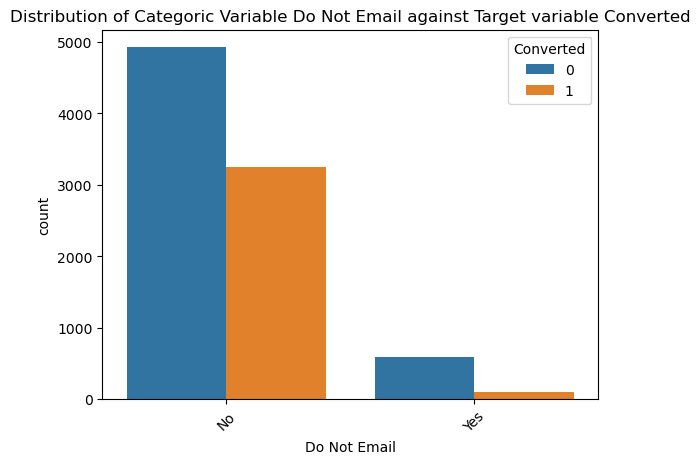

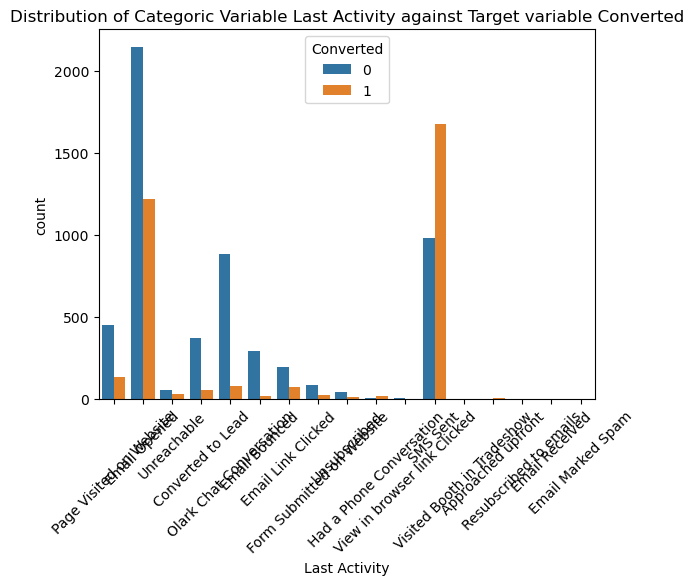

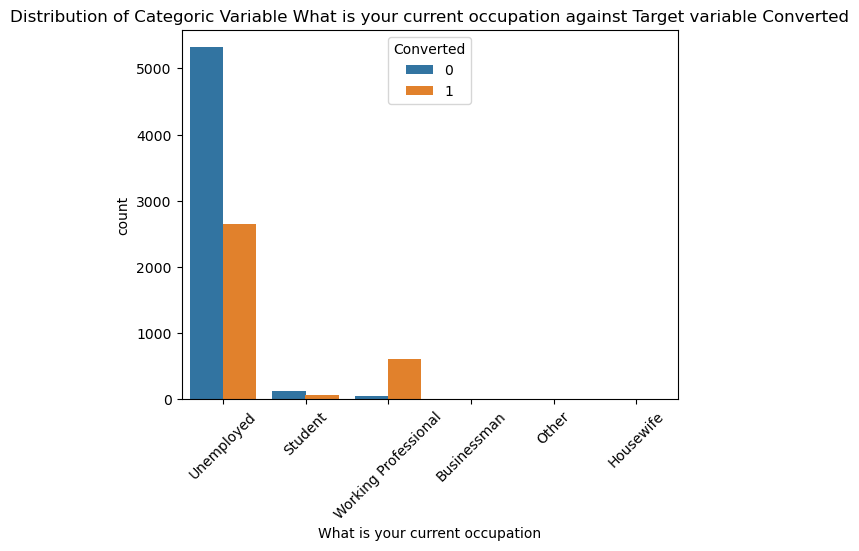

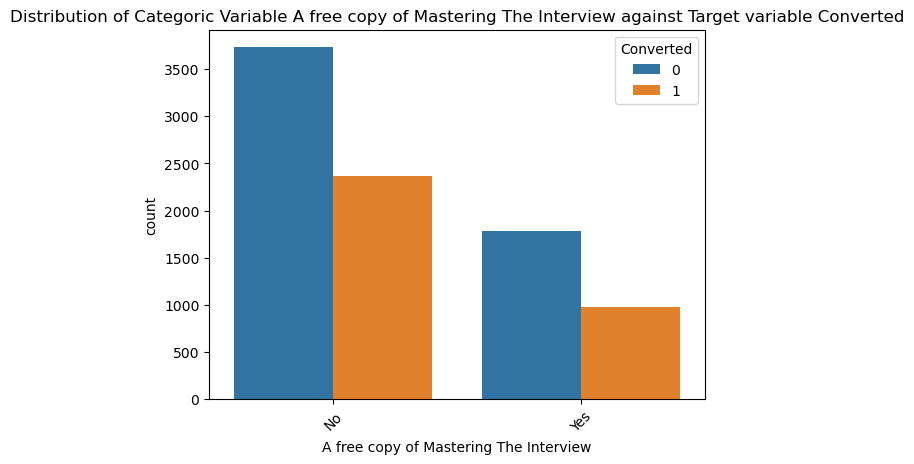

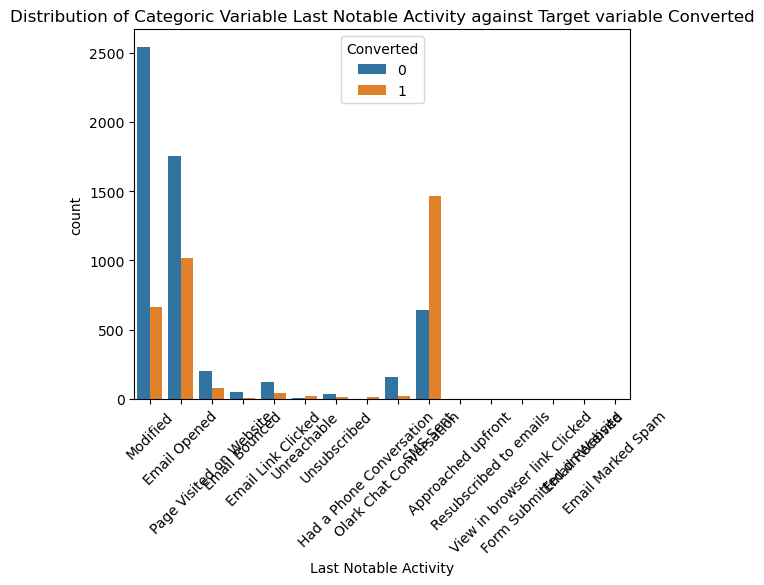

In [962]:
#Univariate analysis of Categorical variables vs Target variables
for i in categoricCols:
    sns.countplot(data = lead_df, x= i, hue ='Converted')
    plt.xticks(rotation=45)
    plt.title("Distribution of Categoric Variable " + str(i) + " against Target variable Converted")
    plt.show()

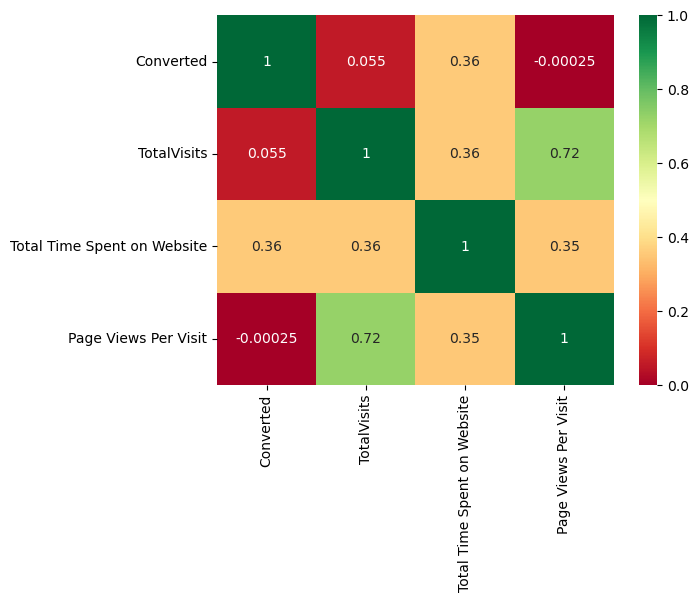

In [963]:
sns.heatmap(lead_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [964]:
lead_df.shape

(8863, 11)

In [965]:
# Percentage of records retained after rows are dropped
round(8863/9240,2)*100

96.0

##### 96% data is retained after EDA

## Step 5: Create Dummy Variables

In [966]:
## Create dummy variables for all categorical variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8863 non-null   object 
 1   Lead Source                             8863 non-null   object 
 2   Do Not Email                            8863 non-null   object 
 3   Converted                               8863 non-null   int64  
 4   TotalVisits                             8863 non-null   float64
 5   Total Time Spent on Website             8863 non-null   int64  
 6   Page Views Per Visit                    8863 non-null   float64
 7   Last Activity                           8863 non-null   object 
 8   What is your current occupation         8863 non-null   object 
 9   A free copy of Mastering The Interview  8863 non-null   object 
 10  Last Notable Activity                   8863 non-null   obje

In [967]:
dummy=pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
     'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [968]:
lead_df = pd.concat([lead_df,dummy],axis=1)

In [969]:
lead_df.shape

(8863, 72)

In [970]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0


In [971]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Email_Yes',
      

In [972]:
#Dropping the categorial columns for which dummies were created
lead_df.drop(columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
     'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)

In [973]:
lead_df.shape

(8863, 65)

## Step 6: Splitting the Data into Training and Testing Sets

In [974]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [975]:
# Putting response variable to y
y= lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [976]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling


###### As outliers were already handled, we are using Standard Scaler.

In [977]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[ ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5425,-0.024078,-0.617232,0.421959,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8586,0.335002,-0.241036,0.967428,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4631,0.694082,-0.224520,0.149225,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4464,-0.024078,-0.536488,-0.396244,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2058,1.412241,-0.602552,-0.450791,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [978]:
### Checking the convertion Rate
conv = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
conv
#Converted rate is 37.8 % 

37.80886832900824

## Step 8: Building a logistic regression model

In [979]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6145
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.3
Date:                Tue, 15 Aug 2023   Deviance:                       5012.6
Time:                        13:16:56   Pearson chi2:                 6.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4040
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.7436   1.08e+05   3.45e-05      1.000   -2.12e+05    2.12e+05
TotalVisits                                              0.3355      0.053      6.280      0.000       0.231       0.440
Total Time Spent on Website                              1.1159      0.041     26.940      0.000       1.035       1.197
Page Views Per Visit                                    -0.1678      0.059     -2.854      0.004      -0.283      -0.053
Lead Origin_Landing Page Submission                     -0.2520      0.110     -2.282      0.022      -0.468      -0.036
Lead Origin_Lead Add Form                               21.9443   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Origin_Lead Import                                 24.7619   8.11e+04      0.000      1.000   -1.59e+05    1.59e+05
Lead Source_Direct Traffic                              19.9497   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Facebook                                    -3.7348   1.11e+05  -3.37e-05      1.000   -2.17e+05    2.17e+05
Lead Source_Google                                      20.2710   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Live Chat                                   22.6140   8.01e+04      0.000      1.000   -1.57e+05    1.57e+05
Lead Source_NC_EDM                                      43.7157    1.1e+05      0.000      1.000   -2.16e+05    2.16e+05
Lead Source_Olark Chat                                  21.3671   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Organic Search                              19.9696   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Pay per Click Ads                           -1.0867   1.07e+05  -1.02e-05      1.000   -2.09e+05    2.09e+05
Lead Source_Press_Release                                0.2499   1.05e+05   2.38e-06      1.000   -2.05e+05    2.05e+05
Lead Source_Reference                                    2.0955      1.489      1.407      0.159      -0.824       5.015
Lead Source_Referral Sites                              19.7186   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Social Media                                -0.6961   1.12e+05  -6.22e-06      1.000   -2.19e+05    2.19e+05
Lead Source_WeLearn                                     43.7349   1.08e+05      0.000      1.000   -2.11e+05    2.11e+05
Lead Source_Welingak Website                             4.7098      1.786      2.637      0.008       1.209       8.211
Lead Source_bing                                        21.0434   7.55e+04      0.000      1.000   -1.48e+05    1.48e+05
Lead Source_blog                                        -2

## Step 9: Feature Selection using RFE


In [980]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [981]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [982]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False])

In [983]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 14),
 ('Lead Source_google', False, 9),
 ('Lead Source_testone', False, 29),
 ('Lead Source_welearnblog_Home', False, 25),
 

In [984]:
col = X_train.columns[rfe.support_]

In [985]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
     

#### Assessing the model with StatsModels

#### Function to build a model using Generalized Linear Model Regression 

In [986]:
def build_logistic_regression_model(df_temp):
    # Adding a constant variable 
    X_train_sm = sm.add_constant(df_temp)
    # Running the linear model
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    # Print Summary
    res = logm1.fit()
    print(res.summary())

#### Function to calculate VIFs 

In [987]:
#Function to calculate VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df_temp):
    vif = pd.DataFrame()
    vif['Features'] = df_temp.columns
    vif['VIF'] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Building Model 1

In [988]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.6
Date:                Tue, 15 Aug 2023   Deviance:                       5109.2
Time:                        13:17:07   Pearson chi2:                 6.55e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [989]:
# P value of the column 'What is your current occupation_Housewife' is high. Hence drop it.
col= col.drop('What is your current occupation_Housewife')

#### Building Model 2

In [990]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6184
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.5
Date:                Tue, 15 Aug 2023   Deviance:                       5112.9
Time:                        13:17:07   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [991]:
# P value of the column 'Last Notable Activity_Had a Phone Conversation' is high. Hence drop it.
col= col.drop('Last Notable Activity_Had a Phone Conversation')

#### Building Model 3

In [992]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6185
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.8
Date:                Tue, 15 Aug 2023   Deviance:                       5115.7
Time:                        13:17:07   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [993]:
# P value of the column 'Lead Source_Reference' is high. Hence drop it.
col= col.drop('Lead Source_Reference')

#### Building Model 4

In [994]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6186
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.5
Date:                Tue, 15 Aug 2023   Deviance:                       5116.9
Time:                        13:17:08   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [995]:
# P value of the column 'What is your current occupation_Working Professional' is high. Hence drop it.
col= col.drop('What is your current occupation_Working Professional')

#### Building Model 5

In [996]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6187
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.2
Date:                Tue, 15 Aug 2023   Deviance:                       5118.5
Time:                        13:17:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Model 5 looks good as p-value is less than 0.05 and VIF is less than 4.

In [997]:
#Run final Model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

### Getting the predicted values on the train set

In [998]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5425    0.896838
8586    0.012417
4631    0.171804
4464    0.379991
2058    0.119302
1719    0.196318
2286    0.695535
1433    0.356314
5550    0.065586
8333    0.124844
dtype: float64

In [999]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89683783, 0.01241672, 0.17180355, 0.37999138, 0.11930201,
       0.19631779, 0.69553517, 0.356314  , 0.06558616, 0.12484387])

In [1000]:
y_train_pred.shape

(6204,)

In [1001]:
y_train.shape

(6204,)

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1002]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadScore_id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id
0,1,0.896838,5425
1,0,0.012417,8586
2,0,0.171804,4631
3,0,0.379991,4464
4,0,0.119302,2058


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0


In [1003]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted
0,1,0.896838,5425,1
1,0,0.012417,8586,0
2,0,0.171804,4631,0
3,0,0.379991,4464,0
4,0,0.119302,2058,0


In [1004]:
from sklearn import metrics

In [1005]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3431  432]
 [ 700 1641]]


In [1006]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175370728562218


#### Checking VIF

In [1007]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.94
13,Last Notable Activity_Modified,2.98
12,Last Notable Activity_Email Opened,2.05
8,Last Activity_Olark Chat Conversation,2.03
4,Do Not Email_Yes,1.82
2,Lead Source_Olark Chat,1.78
6,Last Activity_Email Bounced,1.74
1,Lead Origin_Lead Add Form,1.42
14,Last Notable Activity_Olark Chat Conversation,1.40
3,Lead Source_Welingak Website,1.31


## Metrics beyond simply accuracy


In [1008]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives Generate Metrics

In [1009]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.700982486117044

In [1010]:
# specificity
TN / float(TN+FP)

0.888169816205022

In [1011]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.111830183794978


In [1012]:
# positive predictive value 
print (TP / float(TP+FP))

0.7916063675832128


In [1013]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8305495037521181


##### Specificity is 88.88 is good, but sensitivity is bit low as 70 which should be taken care. We took 0.5 as cut-off randomly.
We need to find trade-off between two and find optimal cut-off which can be done using ROC curve.

## Step 10: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1014]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1015]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


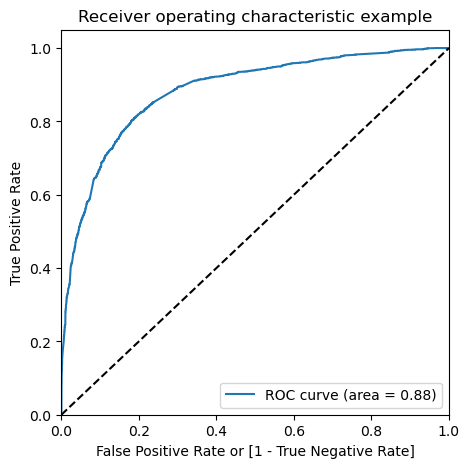

In [1016]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Since we have higher (0.88) area under the ROC curve, our model is a good one.

## Step 11: Determine Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1017]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.896838,5425,1,1,1,1,1,1,1,1,1,1,0
1,0,0.012417,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.171804,4631,0,1,1,0,0,0,0,0,0,0,0
3,0,0.379991,4464,0,1,1,1,1,0,0,0,0,0,0
4,0,0.119302,2058,0,1,1,0,0,0,0,0,0,0,0


In [1018]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.596228  0.961128  0.375097
0.2   0.2  0.749033  0.911576  0.650531
0.3   0.3  0.801096  0.835113  0.780481
0.4   0.4  0.816086  0.766766  0.845975
0.5   0.5  0.817537  0.700982  0.888170
0.6   0.6  0.799323  0.586074  0.928553
0.7   0.7  0.786912  0.510893  0.954181
0.8   0.8  0.762250  0.414353  0.973078
0.9   0.9  0.719858  0.274669  0.989645


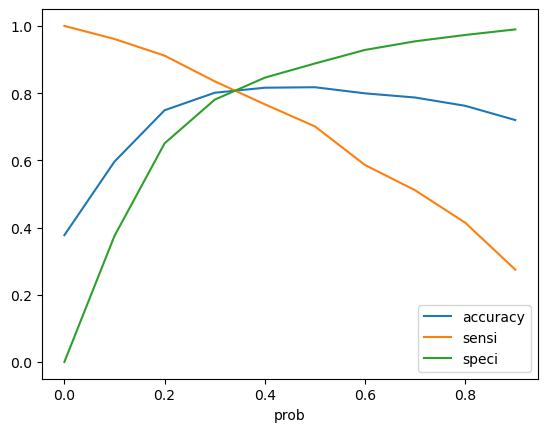

In [1019]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [1020]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.896838,5425,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.012417,8586,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.171804,4631,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.379991,4464,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.119302,2058,0,1,1,0,0,0,0,0,0,0,0,0


In [1021]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.811250805931657

In [1022]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3150,  713],
       [ 458, 1883]])

In [1023]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1024]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8043571123451516

In [1025]:
# Let us calculate specificity
TN / float(TN+FP)

0.8154284235050479

In [1026]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.18457157649495212


In [1027]:
# Positive predictive value 
print (TP / float(TP+FP))

0.725346687211094


In [1028]:
# Negative predictive value
print (TN / float(TN+ FN))

0.873059866962306


### Precision and Recall

In [1029]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3431,  432],
       [ 700, 1641]])

In [1030]:
from sklearn.metrics import precision_score, recall_score

In [1031]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7916063675832128

In [1032]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.700982486117044

### Precision and recall tradeoff


In [1033]:
from sklearn.metrics import precision_recall_curve

In [1034]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

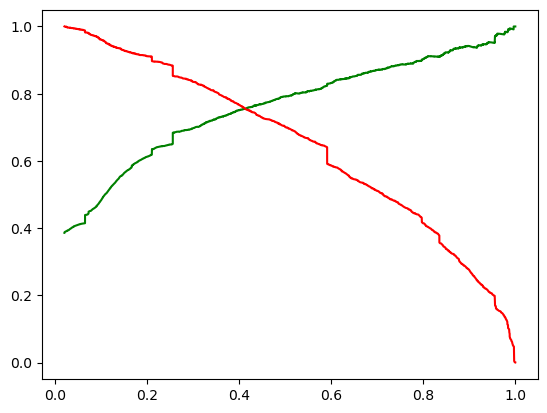

In [1035]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making Predictions on the test set using the Final Model

In [1036]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [1037]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8788,1.647288,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7813,-0.402525,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2403,1.733538,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7243,1.203193,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5363,2.067527,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1038]:
X_test_sm = sm.add_constant(X_test)

In [1039]:
y_test_pred = res.predict(X_test_sm)

In [1040]:
y_test_pred[:10]

8788    0.877847
7813    0.116237
2403    0.887896
7243    0.509142
5363    0.920264
3918    0.509659
3345    0.256152
917     0.081951
7732    0.103746
1702    0.105685
dtype: float64

In [1041]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1042]:
# Let's see the head
y_pred_1.head()

,0
8788,0.877847
7813,0.116237
2403,0.887896
7243,0.509142
5363,0.920264


In [1043]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1044]:
# Putting Lead number to index
y_test_df['LeadScore_id'] = y_test_df.index

In [1045]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1046]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1047]:
y_pred_final.head()

,Converted,LeadScore_id,0
0,0,8788,0.877847
1,0,7813,0.116237
2,1,2403,0.887896
3,1,7243,0.509142
4,1,5363,0.920264


In [1048]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1049]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadScore_id','Converted','Converted_Prob'], axis=1)

In [1050]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadScore_id,Converted,Converted_Prob
0,8788,0,0.877847
1,7813,0,0.116237
2,2403,1,0.887896
3,7243,1,0.509142
4,5363,1,0.920264


In [1051]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1052]:
y_pred_final.head()

,LeadScore_id,Converted,Converted_Prob,final_predicted
0,8788,0,0.877847,1
1,7813,0,0.116237,0
2,2403,1,0.887896,1
3,7243,1,0.509142,1
4,5363,1,0.920264,1


## Step 12: Model Evaluation

In [1053]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8059420834900338

In [1054]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1337,  312],
       [ 204,  806]])

In [1055]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1056]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7980198019801981

In [1057]:
# Let us calculate specificity
TN / float(TN+FP)

0.810794420861128

### Precision and Recall of test set

In [1058]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7209302325581395

In [1059]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7980198019801981

### Precision and recall tradeoff


In [1060]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

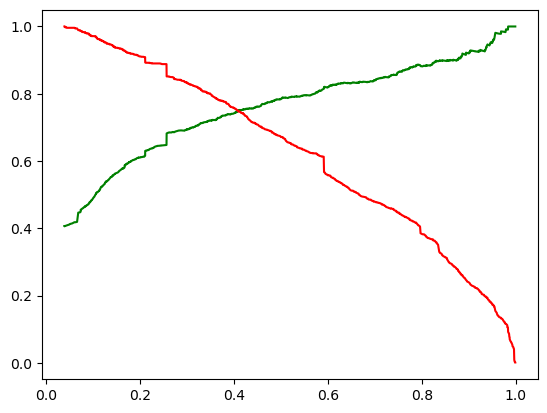

In [1061]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Final Inferences

### 1) Compare the metrics of Train and Test data
Train Data:

    Accuracy: 81.12%

    Sensitivity:80.43%

    Specificity: 81.54%

    Precision: 79.16%

    Recall: 70.1%


Test Data:

    Accuracy: 80.59%

    Sensitivity:79.80%

    Specificity: 81.07%

    Precision: 72.09%

    Recall: 79.80%

### 2) Assign lead score

In [1062]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,LeadScore_id,Converted,Converted_Prob,final_predicted,Lead_Score
0,8788,0,0.877847,1,88
1,7813,0,0.116237,0,12
2,2403,1,0.887896,1,89
3,7243,1,0.509142,1,51
4,5363,1,0.920264,1,92


### 3) Find the hot leads 

Here assuming that lead_score more than 80 are 'Hot Leads'

In [1063]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,LeadScore_id,Converted,Converted_Prob,final_predicted,Lead_Score
0,8788,0,0.877847,1,88
2,2403,1,0.887896,1,89
4,5363,1,0.920264,1,92
18,6423,1,0.987530,1,99
19,809,0,0.983830,1,98
...,...,...,...,...,...
2634,4795,1,0.887433,1,89
2638,2126,1,0.796592,1,80
2640,2598,1,0.996976,1,100
2648,1525,0,0.886105,1,89


#### There are 464 'Hot leads' 

### 4) Identify the significant independent variables

In [1064]:
res.params.sort_values(ascending = False)

Lead Origin_Lead Add Form                        3.931557
const                                            2.858383
Lead Source_Welingak Website                     2.654648
Last Activity_Had a Phone Conversation           2.232543
Lead Source_Olark Chat                           1.245369
Total Time Spent on Website                      1.127307
Last Activity_Converted to Lead                 -0.908847
Last Activity_Email Bounced                     -1.191781
Last Activity_Olark Chat Conversation           -1.335498
Do Not Email_Yes                                -1.337927
Last Notable Activity_Email Opened              -1.434998
Last Notable Activity_Olark Chat Conversation   -1.571857
Last Notable Activity_Modified                  -1.689989
Last Notable Activity_Page Visited on Website   -1.701051
Last Notable Activity_Email Link Clicked        -1.977854
What is your current occupation_Student         -2.396781
What is your current occupation_Unemployed      -2.743182
dtype: float64

Recommendations - 
1) Reachout to customers with lead origin 'Lead Add Form'. These customers have the highest chances of getting converted.

2) Reach out to customers whose lead source is 'Welingak Website' and X education can increase marketing on 'Welingak Website' to improve business. They have a good chance of getting converted.

3) Reach out to customer who had a Phone Conversation as Last Activity.

4) Reach out to customers whose lead source is 'Olark Chat' and X education can increase marketing on 'Olark Chat' to improve business. They have a good chance of getting converted.

5) Reach out to customers who spent more time on website.